## THE NCBI wesite hosts data in two forms FTP and a web app.
   -https://ftp.ncbi.nlm.nih.gov/pathogen/Results/
   
   -https://www.ncbi.nlm.nih.gov/pathogens/isolates/
   
 
   
### the objective is to introduce some basic data processing techniques in pandas like
   - creating dataframe and merging two or more to create bigger dataframes
   - cleaning the data to reduce variation and create a standard data representation
   - wrangling columns to extract information in more standard forms compatible with automation process
   - display a couple of graphing techniques

 #### the code below is written for downloading the data from ftp server.
   - however we will also look at the process of downloading data from the Isolate browser

In [1]:
import ftplib
import os
from ftplib import error_perm
import re
from numpy import split
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup


In [2]:
def int_check(text):
    return int(text) if text.isdigit() else text


def natural_keys(text):
    # Human ssorting is required to remove error in general python sorting which sorts only on the basis iof first digit which makes 854 > 2700
    # http://nedbatchelder.com/blog/200712/human_sorting.html
    return [ int_check(c) for c in re.split(r'(\d+)', text) ]


In [4]:


vgm_url = 'https://ftp.ncbi.nlm.nih.gov/pathogen/Results/Escherichia_coli_Shigella/'
html_text = requests.get(vgm_url).text
soup = BeautifulSoup(html_text, 'html.parser')

list_file=[]
for link in soup.find_all('a'):
    linktxt=link.get('href')
    #print (linktxt)
    urlamr=('https://ftp.ncbi.nlm.nih.gov/pathogen/Results/Escherichia_coli_Shigella/'+ linktxt +'AMR')
    vgm_url1 = urlamr
    html_text1 = requests.get(vgm_url1).text
    soup1 = BeautifulSoup(html_text1, 'html.parser')
    for link1 in soup1.find_all('a'):
        linktxt1=link1.get('href')
        print(linktxt1)
        try:
            if "pdg000000004" in linktxt1.lower() and any(linktxt1.endswith(ext) for ext in ['tsv']):
                list_file.append(linktxt1)
                #print(linktxt)
        except:
            print(" not present")
            continue
list_file.sort(key=natural_keys)
f1_d=list_file[-1]
print("The latest file updated in the NCBI ftp web browser is:",f1_d)

mailto:%5bno%20address%20given%5d
/
mailto:%5bno%20address%20given%5d
/
/pathogen/Results/Escherichia_coli_Shigella/PDG000000004.1107/
PDG000000004.1107.amr.metadata.tsv
PDG000000004.1107.amr.metadata.xml
/pathogen/Results/Escherichia_coli_Shigella/PDG000000004.1675/
PDG000000004.1675.amr.metadata.tsv
PDG000000004.1675.amr.metadata.xml
/pathogen/Results/Escherichia_coli_Shigella/PDG000000004.1945/
PDG000000004.1945.amr.metadata.tsv
PDG000000004.1945.amr.metadata.xml
/pathogen/Results/Escherichia_coli_Shigella/PDG000000004.1995/
PDG000000004.1995.amr.metadata.tsv
PDG000000004.1995.amr.metadata.xml
/pathogen/Results/Escherichia_coli_Shigella/PDG000000004.2056/
PDG000000004.2056.amr.metadata.tsv
PDG000000004.2056.amr.metadata.xml
/pathogen/Results/Escherichia_coli_Shigella/PDG000000004.2128/
PDG000000004.2128.amr.metadata.tsv
PDG000000004.2128.amr.metadata.xml
mailto:%5bno%20address%20given%5d
/
/pathogen/Results/Escherichia_coli_Shigella/PDG000000004.2233/
PDG000000004.2233.amr.metadata.

In [7]:
f2_d=f1_d.rsplit('.', 3)[0] # change the number to select the delimitor for spliting, numbering starts from end
print(f2_d)


PDG000000004.2731


In [8]:
url=('https://ftp.ncbi.nlm.nih.gov/pathogen/Results/Escherichia_coli_Shigella/'+f2_d+'AMR'+f1_d)
response = requests.get(url)
with open(f1_d, 'wb') as f:
    f.write(response.content)

print("downloaded {}".format(f1_d))
    

downloaded PDG000000004.2731.amr.metadata.tsv


### we import the data downloaded from the Isolate browser and start the processing

In [9]:
import pandas as pd
df_Ecoli= pd.read_csv('isolates.tsv', sep='\t', dtype='unicode')
df_Ecoli.head(10) # prints the top n=10 rows

,#Organism Group,AMR genotypes core,Host,Strain,Isolate identifiers,AST phenotypes,Serovar,Scientific name,Isolate,Collection Date,...,Location,Isolation Source,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,AMR genotypes,Computed types
0,E.coli and Shigella,NaN,NaN,PNUSAE016995,"PNUSAE016995,""SRS3701937""",NaN,NaN,Escherichia coli,PDT000366276.2,NaN,...,USA,NaN,clinical,PDS000048518.9,24,10,SAMN09880074,GCA_012123035.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
1,E.coli and Shigella,NaN,NaN,CFSAN086604,"CAB_KRS_131,""CFSAN086604"",""SRS5195362""",NaN,NaN,Escherichia coli,PDT000553412.2,2018,...,USA:FL,bovine manure,environmental/other,PDS000048518.9,0,11,SAMN12422613,GCA_011892145.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
2,E.coli and Shigella,NaN,NaN,CFSAN086600,"CAB_KRS_127,""CFSAN086600"",""SRS5195366""",NaN,NaN,Escherichia coli,PDT000553418.2,2018,...,USA:FL,bovine manure,environmental/other,PDS000048518.9,5,10,SAMN12422639,GCA_011892065.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
3,E.coli and Shigella,NaN,NaN,CFSAN086601,"CAB_KRS_128,""CFSAN086601"",""SRS5195374""",NaN,NaN,Escherichia coli,PDT000553427.2,2018,...,USA:FL,bovine manure,environmental/other,PDS000048518.9,7,14,SAMN12422636,GCA_011891505.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
4,E.coli and Shigella,NaN,NaN,CFSAN086607,"CAB_KRS_134,""CFSAN086607"",""SRS5285959""",NaN,NaN,Escherichia coli,PDT000568693.2,2018,...,USA:FL,bovine manure,environmental/other,PDS000048518.9,0,11,SAMN12601615,GCA_011884085.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
5,E.coli and Shigella,NaN,NaN,CFSAN086517,"CAB_KRS_44,""CFSAN086517"",""SRS5330254""",NaN,NaN,Escherichia coli,PDT000577107.2,2017,...,USA:FL,bovine manure,environmental/other,PDS000048518.9,0,17,SAMN12662738,GCA_011873705.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
6,E.coli and Shigella,NaN,NaN,CFSAN086518,"CAB_KRS_45,""CFSAN086518"",""SRS5330351""",NaN,NaN,Escherichia coli,PDT000577175.2,2017,...,USA:FL,bovine manure,environmental/other,PDS000048518.9,0,17,SAMN12662900,GCA_011873425.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
7,E.coli and Shigella,NaN,NaN,CFSAN086520,"CAB_KRS_47,""CFSAN086520"",""SRS5406452""",NaN,NaN,Escherichia coli,PDT000588884.2,2017,...,USA:FL,bovine manure,environmental/other,PDS000048518.9,0,17,SAMN12784421,GCA_011860925.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
8,E.coli and Shigella,NaN,NaN,PNUSAE054459,"PNUSAE054459,""SRS6911109""",NaN,NaN,Escherichia coli,PDT000772017.1,NaN,...,USA,NaN,clinical,PDS000048518.9,24,18,SAMN15376947,GCA_013651315.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN
9,E.coli and Shigella,NaN,NaN,PNUSAE070477,"PNUSAE070477,""SRS8737854""",NaN,NaN,Escherichia coli,PDT001009390.1,NaN,...,USA,NaN,clinical,PDS000048518.9,33,27,SAMN18809363,GCA_018106985.1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN


In [7]:
shape = df_Ecoli.shape
print("Dimension of the data: ",shape ) 


Dimension of the data:  (77775, 23)


In [8]:
df_Ecoli.columns # to print the columns

Index(['#Organism Group', 'AMR genotypes core', 'Host', 'Strain',
       'Isolate identifiers', 'AST phenotypes', 'Serovar', 'Scientific name',
       'Isolate', 'Collection Date', 'Collected by', 'Create date',
       'BioProject', 'Location', 'Isolation Source', 'Isolation type',
       'SNP cluster', 'Min-same', 'Min-diff', 'BioSample', 'Assembly',
       'AMR genotypes', 'Computed types'],
      dtype='object')

In [196]:
df_Ecoli["Scientific name"].value_counts(sort=True)


Escherichia coli                             66735
Shigella sonnei                               5622
Shigella flexneri                             3093
Escherichia coli O157:H7                       624
Escherichia coli O25b:H4-ST131                 317
                                             ...  
Escherichia coli BIDMC 58                        1
Escherichia coli EC4196                          1
Escherichia coli O91:H21 str. 2009C-3740         1
Escherichia coli O91:H14 str. 06-3691            1
Escherichia coli O157:H7 str. 2011EL-2096        1
Name: Scientific name, Length: 640, dtype: int64

In [197]:
df_EC = df_Ecoli[df_Ecoli["Scientific name"] =="Escherichia coli" ]
df_EC["Scientific name"].value_counts(sort=True)# counts the number of unique values and sorts them


Escherichia coli    66735
Name: Scientific name, dtype: int64

In [161]:
df_EC["Location"].value_counts(sort=True)
df_EC_US = df_EC.loc[df_EC["Location"].str.contains('USA') == True]
df_EC_US["Location"].value_counts(sort=True)



USA                     39059
USA:CA                   2330
USA:PA                   1907
USA:TX                   1689
USA:IA                   1019
                        ...  
USA: Kingsley, IA           1
USA: Unionville, MO         1
USA: Grinnell, IA           1
USA: Madrid, IA             1
USA: Springfield, MN        1
Name: Location, Length: 328, dtype: int64

In [11]:
df_EC_US["Isolate"].value_counts(sort=True)

PDT000190151.3    1
PDT000196633.2    1
PDT000252450.1    1
PDT000251875.1    1
PDT000098749.3    1
                 ..
PDT000687914.1    1
PDT000980350.1    1
PDT000923574.1    1
PDT000638831.2    1
PDT000209853.3    1
Name: Isolate, Length: 66735, dtype: int64

In [12]:
df_EC_US["BioProject"].value_counts(sort=True)


PRJNA218110    35537
PRJNA292667     3999
PRJNA292663     3865
PRJNA230969     3795
PRJNA357722     3451
               ...  
PRJNA516748        1
PRJNA339159        1
PRJNA321453        1
PRJNA276332        1
PRJNA476955        1
Name: BioProject, Length: 446, dtype: int64

In [13]:
df_EC_US["Isolation Source"].value_counts(sort=True)

stool                         4109
urine                         1616
ground turkey                 1349
feces                          939
animal-swine-market swine      644
                              ... 
pancreas                         1
avian bone marrow                1
blood canine                     1
feces primate                    1
feline urine (Felis catus)       1
Name: Isolation Source, Length: 1734, dtype: int64

In [14]:
df_EC_US["Host"].value_counts(sort=True)

Homo sapiens              5397
Bos taurus                1136
Sus scrofa domesticus      228
bovine                     225
Canis lupus familiaris     188
                          ... 
Pig8                         1
Larus sp. (gull)             1
Dolphin                      1
Accipitridae                 1
Pig20                        1
Name: Host, Length: 281, dtype: int64

In [15]:
df_EC_US["Isolation type"].value_counts(sort=True)

clinical               40918
environmental/other    25817
Name: Isolation type, dtype: int64

In [16]:
df_EC_US["AMR genotypes"].value_counts(sort=True)

acrF=COMPLETE,blaEC=COMPLETE,mdtM=COMPLETE                                                                                                                                                                                                                                                                                         22898
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE                                                                                                                                                                                                                                                                                    9171
acrF=PARTIAL,blaEC=COMPLETE,mdtM=COMPLETE                                                                                                                                                                                                                                                                                           1720
blaEC=MISTRAN

#### This function is extracting the values in the AMR genotypes column and splitting them to create a dataframe with amr gene as the column name and the various Gene fields as its cell values.

 <blockquote> Quote __Genefields__ : AMR genotypes, Stress genotypes, Virulence genotypes, AMR genotypes core Isolates Browser, topic listback to top

The fields with gene and point-mutation fields have filters that separate the genes into categories based on characteristics that help to determine how likely the gene/point-mutation is to be properly transcribed and assembled. They are divided into **COMPLETE, POINT, PARTIAL, HMM, MISTRANSLATION, and PARTIAL_END_OF_CONTIG**. More information on what the categories mean is available below and on the AMRFinderPlus wiki. 
    https://github.com/ncbi/amr/wiki/Interpreting-results#the-method-column
</blockquote>

In [18]:
def create_df(df):
    df.columns=["AMR_genotypes"]
    df=df.replace(r'^\s*$','VALUE=ND', regex=True)
    df= df.fillna(0)
    df=df.replace(0, 'VALUE=ND', regex=True)
    df['AMRgenotypes']=df['AMR_genotypes']
    df=df.set_index('AMRgenotypes')
    split_df= df['AMR_genotypes'].str.split(',', expand= True)
    print (split_df.head())
    #now we make the column list for the table using unique values
    split_df_list=[]
    split_df_list = split_df.values.tolist()
    flat_list_sd = []
    for sublist in split_df_list:
        for item in sublist:
            flat_list_sd.append(item)
    split_flsd=[]
    for element in flat_list_sd:
        if element != None:
            split_flsd.append(element.split('=', 1)[0]) 
    header_set=set(split_flsd)
    header_list_AST=list(header_set)
    df_AST=pd.DataFrame(header_list_AST)
    df_AST.columns=["AMR"]
    df_AST=df_AST.T
    df_AST=df_AST.reset_index()
    df_AST=df_AST.T
    df_AST=df_AST.reset_index()
    df_AST=df_AST.drop(['index'], axis=1)
    df_AST.columns=["AMR"]
    print("the columns are,",df_AST)
    x=1
    for tup in split_df.itertuples():
        try:
            #print (tup)
            tuplist=list(tup)
            tup_list_df=pd.DataFrame(tuplist)
            colname=tup_list_df.iloc[0]
            head= pd.DataFrame([colname])
            head=head.reset_index()
            head= head.T
            head=head.reset_index()
            head=head.drop(columns=['index'])
            #print(head)
            head.at[0,0]="AMR"
            head.columns=["header"]
            head_list=head['header'].tolist()
            tup_list_df=tup_list_df.drop([0])
            tup_list_df.columns=["AMR"]
            #print(tup_list_df)
            tup_list_df= tup_list_df.AMR.str.split('=', expand= True)
            tup_list_df.columns=head_list
            
            tup_list_df=tup_list_df.T
            tup_list_df=tup_list_df.reset_index()
            tup_list_df=tup_list_df.T
            tup_list_df.columns=["AMR","AMR_g"]
            #print(tup_list_df)
            #tup_list_df_list= list(tup_list_df)
            tup_list_df_list=list(tup_list_df.itertuples(index=False, name=None))
            tup_list_df_list_dict=dict(tup_list_df_list)
            #tup_list_df_list_dict=dict(tup_list_df_list)
            df_AST[x]=df_AST['AMR'].map(tup_list_df_list_dict)
            x=x+1
            print (x)

        except:
            print("No result updated")
            continue
    
    df_AST=df_AST.T
    return (df_AST)


### Due to the large size and long computation method for the above conversion we have only run the head (n=100) rows. 

In [17]:
df = df_EC_US[["AMR genotypes"]].copy()
dfhead=df.head(100)

In [21]:
df_AMRgene=create_df(dfhead)
print("AMR genotype dataframe created")


                                                                   0   \
AMRgenotypes                                                            
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  acrF=MISTRANSLATION   
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  acrF=MISTRANSLATION   
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  acrF=MISTRANSLATION   
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  acrF=MISTRANSLATION   
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  acrF=MISTRANSLATION   

                                                              1   \
AMRgenotypes                                                       
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  blaEC=COMPLETE   
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  blaEC=COMPLETE   
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  blaEC=COMPLETE   
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  blaEC=COMPLETE   
acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE  blaEC=COMPLETE   

           

In [20]:
df_test = df_EC_US[["AST phenotypes"]].copy()
df_testhd=df_test.head(100)
df_astresult=create_df(df_testhd)

                    0     1     2     3     4     5     6     7     8     9   \
AMRgenotypes                                                                   
VALUE=ND      VALUE=ND  None  None  None  None  None  None  None  None  None   
VALUE=ND      VALUE=ND  None  None  None  None  None  None  None  None  None   
VALUE=ND      VALUE=ND  None  None  None  None  None  None  None  None  None   
VALUE=ND      VALUE=ND  None  None  None  None  None  None  None  None  None   
VALUE=ND      VALUE=ND  None  None  None  None  None  None  None  None  None   

                10    11    12    13    14    15  
AMRgenotypes                                      
VALUE=ND      None  None  None  None  None  None  
VALUE=ND      None  None  None  None  None  None  
VALUE=ND      None  None  None  None  None  None  
VALUE=ND      None  None  None  None  None  None  
VALUE=ND      None  None  None  None  None  None  
the columns are,                AMR
0              AMR
1         amikacin
2      t

#### we will be importing the saved files for these dataframe

In [172]:
df_AMRgene=pd.read_csv("df_AMRGENE.tsv",sep="\t", dtype="unicode") 
df_astresult=pd.read_csv("df_astresult.tsv", sep="\t", dtype="unicode")

In [173]:
df_AMRgene.head()

,Unnamed: 0,AMR_id,AMR_genotype,parE_I355T,aac(6'),cmlA1,aac(3)-Ia,blaTEM-6,floR,aadA11,...,tet(Q),mph(A),blaFOX-5,blaNDM-5,oqxB2,cyaA_S352T,blaCMY-4,dfrA29,blaCMY,tetB(60)
0,0,0,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,"acrF=MISTRANSLATION,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df_astresult.head()

,Unnamed: 0,AST_id,AST_phenotype,cefuroxime,cefotetan,amikacin,piperacillin,cefazolin,ceftiofur,amoxicillin-clavulanic acid,...,tobramycin,tigecycline,polymyxin B,streptomycin,levofloxacin,cefoxitin,ceftazidime,ciprofloxacin,ceftazidime-clavulanic acid,cefotaxime
0,0,0,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df_EC_US=df_EC_US.reset_index()
df_EC_US=df_EC_US.rename(columns={'index':'ID'})

In [175]:
df_astresult['AST_id'] = df_astresult['AST_id'].astype(str) # before merging both ids should be converter to string to avoid dtype mismatch error
df_AMRgene['AMR_id'] = df_AMRgene['AMR_id'].astype(str)
df_EC_US['ID'] = df_EC_US['ID'].astype(str)

In [176]:
df_main=pd.DataFrame()
df_main=df_EC_US.merge(df_astresult,how='left', left_on='ID', right_on='AST_id')
df_main=df_main.merge(df_AMRgene,how='left', left_on='ID', right_on='AMR_id')


In [177]:
df_main.head()

,ID,#Organism Group,AMR genotypes core,Host,Strain,Isolate identifiers,AST phenotypes,Serovar,Scientific name,Isolate,...,tet(Q),mph(A),blaFOX-5,blaNDM-5,oqxB2,cyaA_S352T,blaCMY-4,dfrA29,blaCMY,tetB(60)
0,0,E.coli and Shigella,NaN,NaN,PNUSAE016995,"PNUSAE016995,""SRS3701937""",NaN,NaN,Escherichia coli,PDT000366276.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E.coli and Shigella,NaN,NaN,CFSAN086604,"CAB_KRS_131,""CFSAN086604"",""SRS5195362""",NaN,NaN,Escherichia coli,PDT000553412.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,E.coli and Shigella,NaN,NaN,CFSAN086600,"CAB_KRS_127,""CFSAN086600"",""SRS5195366""",NaN,NaN,Escherichia coli,PDT000553418.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,E.coli and Shigella,NaN,NaN,CFSAN086601,"CAB_KRS_128,""CFSAN086601"",""SRS5195374""",NaN,NaN,Escherichia coli,PDT000553427.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,E.coli and Shigella,NaN,NaN,CFSAN086607,"CAB_KRS_134,""CFSAN086607"",""SRS5285959""",NaN,NaN,Escherichia coli,PDT000568693.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The OneHealth information iin the dataset are available in 3 columns Host, isolation source, isolation type. These columns have inconsistencies and missing data. We aim to process these columns into a single column with no missing data.

   [Reference for one health](https://www.cdc.gov/drugresistance/biggest-threats.html)
    
  

In [28]:
df_Ecoli_SH=pd.DataFrame()
df_Ecoli_SH=df_EC_US[["Isolation Source","Host","Isolation type"]].copy()
df_Ecoli_SH["sourcehostcomb"] = df_EC_US["Isolation Source"].fillna('IMV').astype(str) +'_'+ df_EC_US["Host"].fillna('HMV').astype(str) +'_'+df_EC_US["Isolation type"].fillna('TMV').astype(str)
df_Ecoli_SH=df_Ecoli_SH.rename(columns={'Isolation Source':'Isolation_Source','Isolation type':'Isolation_type'})
Ecoli_IB_Merged_df=pd.crosstab( df_Ecoli_SH.sourcehostcomb,df_Ecoli_SH.Isolation_type,  margins=True, margins_name="total")

In [30]:
Ecoli_IB_Merged_df.head(20)

Isolation_type,clinical,environmental/other,total
sourcehostcomb,,,
ARMADA Isolate_Homo sapiens_clinical,2,0,2
ATCC Isolate_NIST Mixed Microbial RM strain_clinical,1,0,1
Abcess_Ailuropoda melanoleuca_environmental/other,0,1,1
Abcess_Ara ararauna_environmental/other,0,1,1
Abdominal swab (Sus scrofa domesticus)_HMV_environmental/other,0,1,1
Abdominal wound_Homo sapiens_clinical,1,0,1
Abscess (Canine)_HMV_environmental/other,0,1,1
Abscess (Canis lupus familiaris )_HMV_environmental/other,0,1,1
Abscess (Canis lupus familiaris)_HMV_environmental/other,0,3,3


In [31]:
import re
Ecoli_IB_Merged_df=Ecoli_IB_Merged_df.reset_index()
Ecoli_IB_Merged_df["epitype"]=Ecoli_IB_Merged_df["sourcehostcomb"]
Ecoli_IB_Merged_df['epitype'] = Ecoli_IB_Merged_df['epitype'].map(lambda x: re.sub(r'W+', '-', x)) #removes all characters which are not words 
Ecoli_IB_Merged_df['epitype'] = Ecoli_IB_Merged_df['epitype'].map(lambda x: re.sub(" ", "-", x))
Ecoli_IB_Merged_df['epitype'] = Ecoli_IB_Merged_df['epitype'].str.lower()#converts the colmn into all lower cases
Ecoli_IB_Merged_df["epi_hostname"]=Ecoli_IB_Merged_df["epitype"]
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('clinical|sapiens',na=False),'epi_hostname'] = 'Homosapiens'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('stockpellet|livestockfeed|animalfeed|animalfeed|milksus|milkporcine|petfood|peaproteinpellet|animalfeed|grass|feedgrass|feedhmv|catfood|dogfood',na=False),'epi_hostname'] = 'Animalfood'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('cheese|chocolate|icecream|dairyproducts|milk|roquefort',na=False),'epi_hostname'] = 'Dairy'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('veggie|piecrust|lettuce|spinach|coriander|sprouts|pepper|flour|alfalfa|leafygreens|basil|cherrytomato|cucumber|parsley|pizzadough|kale|grain|celery|almond|berries|berry|applecider|apple|cider|chard|cilantro|clover|soynut|tomato|carrot|forage|mint|springmix|vegetable|romaine|melon|microgreen|nuts|organic|oregano|basil|freshsage|rosemary|bean|foodhmv|foodsamplehmv|foodsamplefood|cepa|kolarabi|peaprotein|cabbage|leaf|thyme|springmix|creamysoynutbutter|soynut|cantaloupehmv|cantalopehmv',na=False),'epi_hostname'] = 'plant_based_food'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('porkhmv|wholechicken|chickenskin|skinsamplegallus|foodturkey|egg|vealtrim|beefstreak|carcass|carcassswab|beefcarctrim|beefcutlet|beefpatties|patties|turkeypatties|rawveal|rawbeef|beeftrim|groundbeef|groundpork|groundmeat|groundturkey|meatsticks|meatsauce|tenderloin|hamburger|burger|meat|meatloaf|commercial|salami|shrimp|piecrust|venison|boneless|breast|steak|siluriformes|porkchop|product|ground|comminuted|food(pork)|foodpork|packaged|sliced|yolk|chickenwing|chickenthigh|wing|chickenleg|mixedparts|beefcarcass|venison',na=False),'epi_hostname'] = 'Meat/Meatproduct'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('bullmanure|ovine|bostaurus|beef|cattle|cow|bos|bovine|calf|veal|buffalo|goat|udder|mastitis|sheep|caprahircus|ovisaries',na=False),'epi_hostname'] = 'Ruminant'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('pig|porcine|swine|sus|feralswine|feralpig',na=False),'epi_hostname'] = 'Swine'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('turkey|chicken|goose|duck|gallus|meleagris',na=False),'epi_hostname'] = 'Poultry'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('canine|dog|familiaris|familaris',na=False),'epi_hostname'] = 'Dog'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('horse|equus|columba|equine|equis',na=False),'epi_hostname'] = 'Horse'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('fecesfeline|lungcat|catfeline|imvcat|cathmv|feliscatus|urinefeline',na=False),'epi_hostname'] = 'Cat'
Ecoli_IB_Merged_df.loc[Ecoli_IB_Merged_df.epi_hostname.str.contains('environment|environmental',na=False),'epi_hostname'] = 'Environment'

/usr/local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [178]:
Ecoli_IB_Merged_df=Ecoli_IB_Merged_df.rename(columns={'epi_hostname':'OneHealth_host'})

In [198]:
### this the data dictionary which will be used to map consistent data into the target columnOneHealth_host

In [179]:
Ecoli_IB_Merged_df.head(20) 

Isolation_type,sourcehostcomb,clinical,environmental/other,total,epitype,OneHealth_host
0,ARMADA Isolate_Homo sapiens_clinical,2,0,2,armada-isolate_homo-sapiens_clinical,Homosapiens
1,ATCC Isolate_NIST Mixed Microbial RM strain_cl...,1,0,1,atcc-isolate_nist-mixed-microbial-rm-strain_cl...,Homosapiens
2,Abcess_Ailuropoda melanoleuca_environmental/other,0,1,1,abcess_ailuropoda-melanoleuca_environmental/other,Environment
3,Abcess_Ara ararauna_environmental/other,0,1,1,abcess_ara-ararauna_environmental/other,Environment
4,Abdominal swab (Sus scrofa domesticus)_HMV_env...,0,1,1,abdominal-swab-(sus-scrofa-domesticus)_hmv_env...,Swine
5,Abdominal wound_Homo sapiens_clinical,1,0,1,abdominal-wound_homo-sapiens_clinical,Homosapiens
6,Abscess (Canine)_HMV_environmental/other,0,1,1,abscess-(canine)_hmv_environmental/other,Dog
7,Abscess (Canis lupus familiaris )_HMV_environm...,0,1,1,abscess-(canis-lupus-familiaris-)_hmv_environm...,Dog
8,Abscess (Canis lupus familiaris)_HMV_environme...,0,3,3,abscess-(canis-lupus-familiaris)_hmv_environme...,Dog
9,Abscess_Canis lupus familiaris_environmental/o...,0,2,2,abscess_canis-lupus-familiaris_environmental/o...,Dog


In [35]:
#Ecoli_IB_Merged_df.to_csv("Ecoli_IB_Merged_df.tsv", sep='\t') #write into the repository

In [180]:
df_main["sourcehostcomb"] = df_main["Isolation Source"].fillna('IMV').astype(str) +'_'+ df_main["Host"].fillna('HMV').astype(str) +'_'+df_main["Isolation type"].fillna('TMV').astype(str)
Oh_dict = dict(zip(Ecoli_IB_Merged_df.sourcehostcomb, Ecoli_IB_Merged_df.OneHealth_host))
df_main['OneHealth_host']=df_main['sourcehostcomb'].map(Oh_dict)


In [181]:
df_main["OneHealth_host"].value_counts()

Homosapiens         40918
Ruminant             7073
Environment          6976
Meat/Meatproduct     4055
Swine                2782
Poultry              2605
Dog                  1355
plant_based_food      693
Horse                 148
Dairy                 129
Animalfood              1
Name: OneHealth_host, dtype: int64

### collection date 

In [182]:
df_EC_US["Collection Date"].value_counts()

2018          2444
2019          2201
2017          1781
2020          1433
2016          1182
              ... 
2008-03-13       1
2008-06-25       1
2016-08-29       1
2020-04-09       1
2014-04-07       1
Name: Collection Date, Length: 2800, dtype: int64

In [185]:
df_CD=df_EC_US[["Collection Date"]].copy()
def cd(df_CD):
    df_CD = df_CD.fillna('2030') 
    df_CD = df_CD.replace('1900/1949','1949') 
    df_CD = df_CD.replace('1949/1900','1949')
    df_CD = df_CD.replace('1900/1960','1960')
    df_CD = df_CD.replace('2017/2018','2018')
    df_CD = df_CD.replace('2015-01/2016-07','2015')
    df_CD = df_CD.replace('2018-11/2019-03','2019')
    df_ser=pd.Series(df_CD.values.tolist(), index=df_CD.index)
    df_CD['cd_mod']=df_ser.apply(lambda x: pd.to_datetime(x).strftime('%m-%d-%Y')[0])
    df_CD['cd_year']=df_ser.apply(lambda x: pd.to_datetime(x).strftime('%Y')[0])
    return (df_CD)

df_date=cd(df_CD)
df_date=df_date.reset_index()
df_date=df_date.rename(columns={'index':'cd_id'})
df_date['cd_id'] = df_date['cd_id'].astype(str) #this converts both the merging ID to string to avoid datatype mismatch

In [186]:

df_main=df_main.merge(df_date,how='left', left_on='ID', right_on='cd_id')
df_main["cd_year"] = df_main["cd_year"].replace('2030',np.nan) 

### Location - Targetted to map state name to each cell value 

In [187]:
df_EC_US["Location"].value_counts()

USA                     39059
USA:CA                   2330
USA:PA                   1907
USA:TX                   1689
USA:IA                   1019
                        ...  
USA: Kingsley, IA           1
USA: Unionville, MO         1
USA: Grinnell, IA           1
USA: Madrid, IA             1
USA: Springfield, MN        1
Name: Location, Length: 328, dtype: int64

In [188]:
gloc_df=df_EC_US[["Location"]].copy()

In [189]:
df_stcode=pd.read_csv("statelatlong.csv")
df_stcode

,statecode,Lat,Long,state
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California
5,CO,38.997934,-105.550567,Colorado
6,CT,41.518783,-72.757507,Connecticut
7,DE,39.145251,-75.418921,Delaware
8,DC,38.899349,-77.014567,District of Columbia
9,FL,27.975728,-83.833017,Florida


In [190]:

def locdict(gloc_df, df_stcode):
    loc_dict=df_stcode.set_index('statecode')['state'].to_dict()
    stcode_list=df_stcode['statecode'].tolist()
    st_list=df_stcode['state'].tolist()
    gloc_df["state"]=gloc_df["Location"]
    gloc_df["state"]=gloc_df.state.str.split(':').str[1]
    gloc_df["state"] = gloc_df.state.str.lstrip() 
    #extracting the state code by using pattern 'pat' and assigns na where not available
    pat = r'({})'.format('|'.join(stcode_list))
    gloc_df['state'] = gloc_df['state'].str.extract(pat, expand=False).fillna(gloc_df['state'])
    gloc_df['state'] =gloc_df['state'].map(loc_dict).fillna(gloc_df['state'])
    #the same as statecode but the pattern list is state name
    pat = r'({})'.format('|'.join(st_list)) 
    gloc_df['state'] = gloc_df['state'].str.extract(pat, expand=False).fillna(gloc_df['state'])
    #replacing the center names
    gloc_df=gloc_df.replace(to_replace ="Fort Sam Houston", value ="Texas")
    gloc_df=gloc_df.replace(to_replace ="Houston", value ="Texas")
    gloc_df=gloc_df.replace(to_replace ="Baltimore", value ="Maryland")
    gloc_df=gloc_df.replace(to_replace ="St. Louis Clyde watershed of Lake Superior", value ="St Louis")
    gloc_df=gloc_df.replace(to_replace ="UC Davis Medical Center", value ="California")
    gloc_df=gloc_df.replace(to_replace ="UC Davis Medical Center, Davis, Ca", value ="California")
    gloc_df=gloc_df.replace(to_replace ="University of Miami Department of Pathology", value ="Florida")
    gloc_df=gloc_df.replace(to_replace ="Burlington", value ="Vermont")
    gloc_df=gloc_df.replace(to_replace ="Lahey Hospital & Medical Center", value ="Massachusetts")
    gloc_df=gloc_df.replace(to_replace ="Ronald Reagan UCLA Medical Center", value ="California")
    gloc_df=gloc_df.replace(to_replace ="Santa Barbara, UCSB animal house", value ="New Jersey")
    gloc_df=gloc_df.replace(to_replace ="Robert Wood Johnson", value ="California")
    gloc_df=gloc_df.replace(to_replace ="ALACHUA", value ="Florida")
    gloc_df=gloc_df.replace(to_replace ="University of Miami Department of Pathology", value ="Florida")
    gloc_df["state"]=gloc_df["state"].replace ("USA",np.nan)

    return ( gloc_df)
df_state=locdict(gloc_df,df_stcode)

In [191]:
df_state

,Location,state
0,USA,NaN
1,USA:FL,Florida
2,USA:FL,Florida
3,USA:FL,Florida
4,USA:FL,Florida
...,...,...
66730,"USA: Minnesota, Buffalo River Watershed",Minnesota
66731,"USA: Minnesota, Buffalo River Watershed",Minnesota
66732,"USA: Minnesota, Buffalo River Watershed",Minnesota
66733,"USA: Minnesota, Buffalo River Watershed",Minnesota


In [192]:
st_dict = dict(zip(df_state.Location, df_state.state))
df_main['Collection_state']=df_main['Location'].map(st_dict)


In [193]:
df_main['Collection_state'].value_counts()

California       2604
Pennsylvania     2362
Texas            1880
Minnesota        1422
Washington       1344
                 ... 
Milwaukee           1
upper Midwest       1
Gainesville         1
Lafayette           1
midwest             1
Name: Collection_state, Length: 83, dtype: int64

In [ ]:
#df_main.to_csv("df_main_complete.tsv", sep="\t", index=False )

# more descriptive analysis

In [44]:
df_mainC=pd.read_csv("df_main_complete.tsv", sep="\t",dtype='unicode')


In [45]:
df_mainC.head()

,ID,#Organism Group,AMR genotypes core,Host,Strain,Isolate identifiers,AST phenotypes,Serovar,Scientific name,Isolate,...,ant(3'')-Ia,blaLAP,sourcehostcomb,OneHealth_host,cd_id,Collection Date_y,cd_mod,cd_year,st_id,Collection_state
0,0,E.coli and Shigella,NaN,NaN,PNUSAE016995,"PNUSAE016995,""SRS3701937""",NaN,NaN,Escherichia coli,PDT000366276.2,...,NaN,NaN,IMV_HMV_clinical,Homosapiens,0,2030,1/1/30,2030,0,NaN
1,1,E.coli and Shigella,NaN,NaN,CFSAN086604,"CAB_KRS_131,""CFSAN086604"",""SRS5195362""",NaN,NaN,Escherichia coli,PDT000553412.2,...,NaN,NaN,bovine manure_HMV_environmental/other,Ruminant,1,2018,1/1/18,2018,1,Florida
2,2,E.coli and Shigella,NaN,NaN,CFSAN086600,"CAB_KRS_127,""CFSAN086600"",""SRS5195366""",NaN,NaN,Escherichia coli,PDT000553418.2,...,NaN,NaN,bovine manure_HMV_environmental/other,Ruminant,2,2018,1/1/18,2018,2,Florida
3,3,E.coli and Shigella,NaN,NaN,CFSAN086601,"CAB_KRS_128,""CFSAN086601"",""SRS5195374""",NaN,NaN,Escherichia coli,PDT000553427.2,...,NaN,NaN,bovine manure_HMV_environmental/other,Ruminant,3,2018,1/1/18,2018,3,Florida
4,4,E.coli and Shigella,NaN,NaN,CFSAN086607,"CAB_KRS_134,""CFSAN086607"",""SRS5285959""",NaN,NaN,Escherichia coli,PDT000568693.2,...,NaN,NaN,bovine manure_HMV_environmental/other,Ruminant,4,2018,1/1/18,2018,4,Florida


In [46]:
df_mainC.shape

(66735, 506)

In [49]:
df_mainC.columns


Index(['ID', '#Organism Group', 'AMR genotypes core', 'Host', 'Strain',
       'Isolate identifiers', 'AST phenotypes', 'Serovar', 'Scientific name',
       'Isolate',
       ...
       'ant(3'')-Ia', 'blaLAP', 'sourcehostcomb', 'OneHealth_host', 'cd_id',
       'Collection Date_y', 'cd_mod', 'cd_year', 'st_id', 'Collection_state'],
      dtype='object', length=506)

In [55]:
df_astresult=pd.read_csv("df_astresult.tsv", sep="\t", dtype="unicode")
list_ast=list(df_astresult.columns)
list_ast.remove('AST_phenotype')
df_astresult.tail(100)

,AST_phenotype,piperacillin-tazobactam,ceftriaxone,cefuroxime,ampicillin,minocycline,imipenem,cefepime,nitrofurantoin,nalidixic acid,...,levofloxacin,ampicillin-sulbactam,tetracycline,trimethoprim-sulfamethoxazole,cefazolin,sulfamethoxazole,chloramphenicol,cephalothin,cefalexin,ceftazidime
66635,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66636,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66637,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66638,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66639,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66730,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66731,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66732,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66733,VALUE=ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_AMRgene=pd.read_excel("df_AMRgene.xlsx")
df_AMRgene = df_AMRgene.iloc[: , 1:] #drops the first index column
list_amrgene=list(df_AMRgene.columns)
list_amrgene.remove('AMR_genotype')
df_AMRgene.tail(100)

,AMR_genotype,blaTEM-169,ere(A),soxS_A12S,gyrA_D87Y,ant(3'')-Ia,mef(B),acrF,blaCTX-M-115,msr(E),...,blaTEM-35,parE_L445H,blaTEM-19,tet(X2),dfrA23,blaTEM-1,qnrD1,blaSHV-11,erm(C),uhpA_G97D
66635,"acrF=COMPLETE,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66636,"acrF=COMPLETE,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66637,"acrF=COMPLETE,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66638,"acrF=PARTIAL,blaEC=COMPLETE,fosA7.5=COMPLETE,m...",NaN,NaN,NaN,NaN,NaN,NaN,PARTIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66639,"acrF=PARTIAL,blaEC=COMPLETE,fosA7.5=COMPLETE,m...",NaN,NaN,NaN,NaN,NaN,NaN,PARTIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66730,"acrF=COMPLETE,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66731,"acrF=COMPLETE,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66732,"acrF=COMPLETE,blaEC=COMPLETE,emrD=COMPLETE,mdt...",NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66733,"acrF=COMPLETE,blaEC=COMPLETE,mdtM=COMPLETE",NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Crosstabulation : 
   [pandas crosstabulation reference](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [57]:
def gene_frequency(lst_,df_kleb):
    try:
        appended_data=[]
        for k in lst_:
            try:
                xdf_crosstab=pd.crosstab(df_kleb["Isolate"],df_kleb[k])
                xdf_crosstab["AMR_gene"] = k
                print('xdf',xdf_crosstab)
                print('') # for spacing
                if len(xdf_crosstab.index) >1:
                    #print("xdf_crosstab.index",xdf_crosstab.index)
                    appended_data.append(xdf_crosstab)
                else:
                    print("only one tested")
                    
            except:
                print("not found")
                continue
        appended_data= pd.concat(appended_data, sort= False) 
        appended_data=appended_data.drop("missing")
        appended_data=appended_data.drop("")
    except:
        print("completed??",k)

    return(appended_data)

In [58]:
df_gf=gene_frequency(list_amrgene,df_mainC)
df_gf = df_gf.replace( np.nan, 0) 
df_gf["Gene_frequency"]= df_gf.sum(axis=1)
df_gf= df_gf.drop(["MISTRANSLATION","PARTIAL","POINT","PARTIAL_END_OF_CONTIG","COMPLETE","HMM"], axis=1)
df_gc=df_gf.groupby(['AMR_gene']).sum()
df_gc=df_gc.reset_index()

xdf blaTEM-169      COMPLETE    AMR_gene
Isolate                             
PDT000392132.2         1  blaTEM-169
PDT000627606.1         1  blaTEM-169
PDT001025555.1         1  blaTEM-169

xdf ere(A)          COMPLETE  MISTRANSLATION  PARTIAL  PARTIAL_END_OF_CONTIG  \
Isolate                                                                    
PDT000003950.2         1               0        0                      0   
PDT000066889.3         1               0        0                      0   
PDT000104590.3         1               0        0                      0   
PDT000142661.1         0               0        1                      0   
PDT000218104.2         0               0        1                      0   
PDT000251485.1         1               0        0                      0   
PDT000251566.1         0               0        0                      1   
PDT000254248.3         0               0        1                      0   
PDT000298471.3         1               0      

In [60]:
df_gc.head(50)

,AMR_gene,Gene_frequency
0,23S_T2609C,2.0
1,aac(2')-IIa,27.0
2,aac(3),6.0
3,aac(3)-I,2.0
4,aac(3)-II,11.0
5,aac(3)-IIa,28.0
6,aac(3)-IId,1034.0
7,aac(3)-IIe,356.0
8,aac(3)-IIg,9.0
9,aac(3)-IV,29.0


## Plotting the ECDF function values to determine the AMR genes with the highest value in the dataset
    
  - 427 AMR genes are present in the *E.coli* database from NCBI however we are intereted in analysing the the AMR genes which are identified in a high number of isolates.
  - Some example ECDF values are:
  >P(x<100): 0.738 
  
   >P(x<500): 0.846 
  
  >P(x<1200): 0.908
              
    

P(x<100): 0.738
P(x<500): 0.846
P(x<1200): 0.908


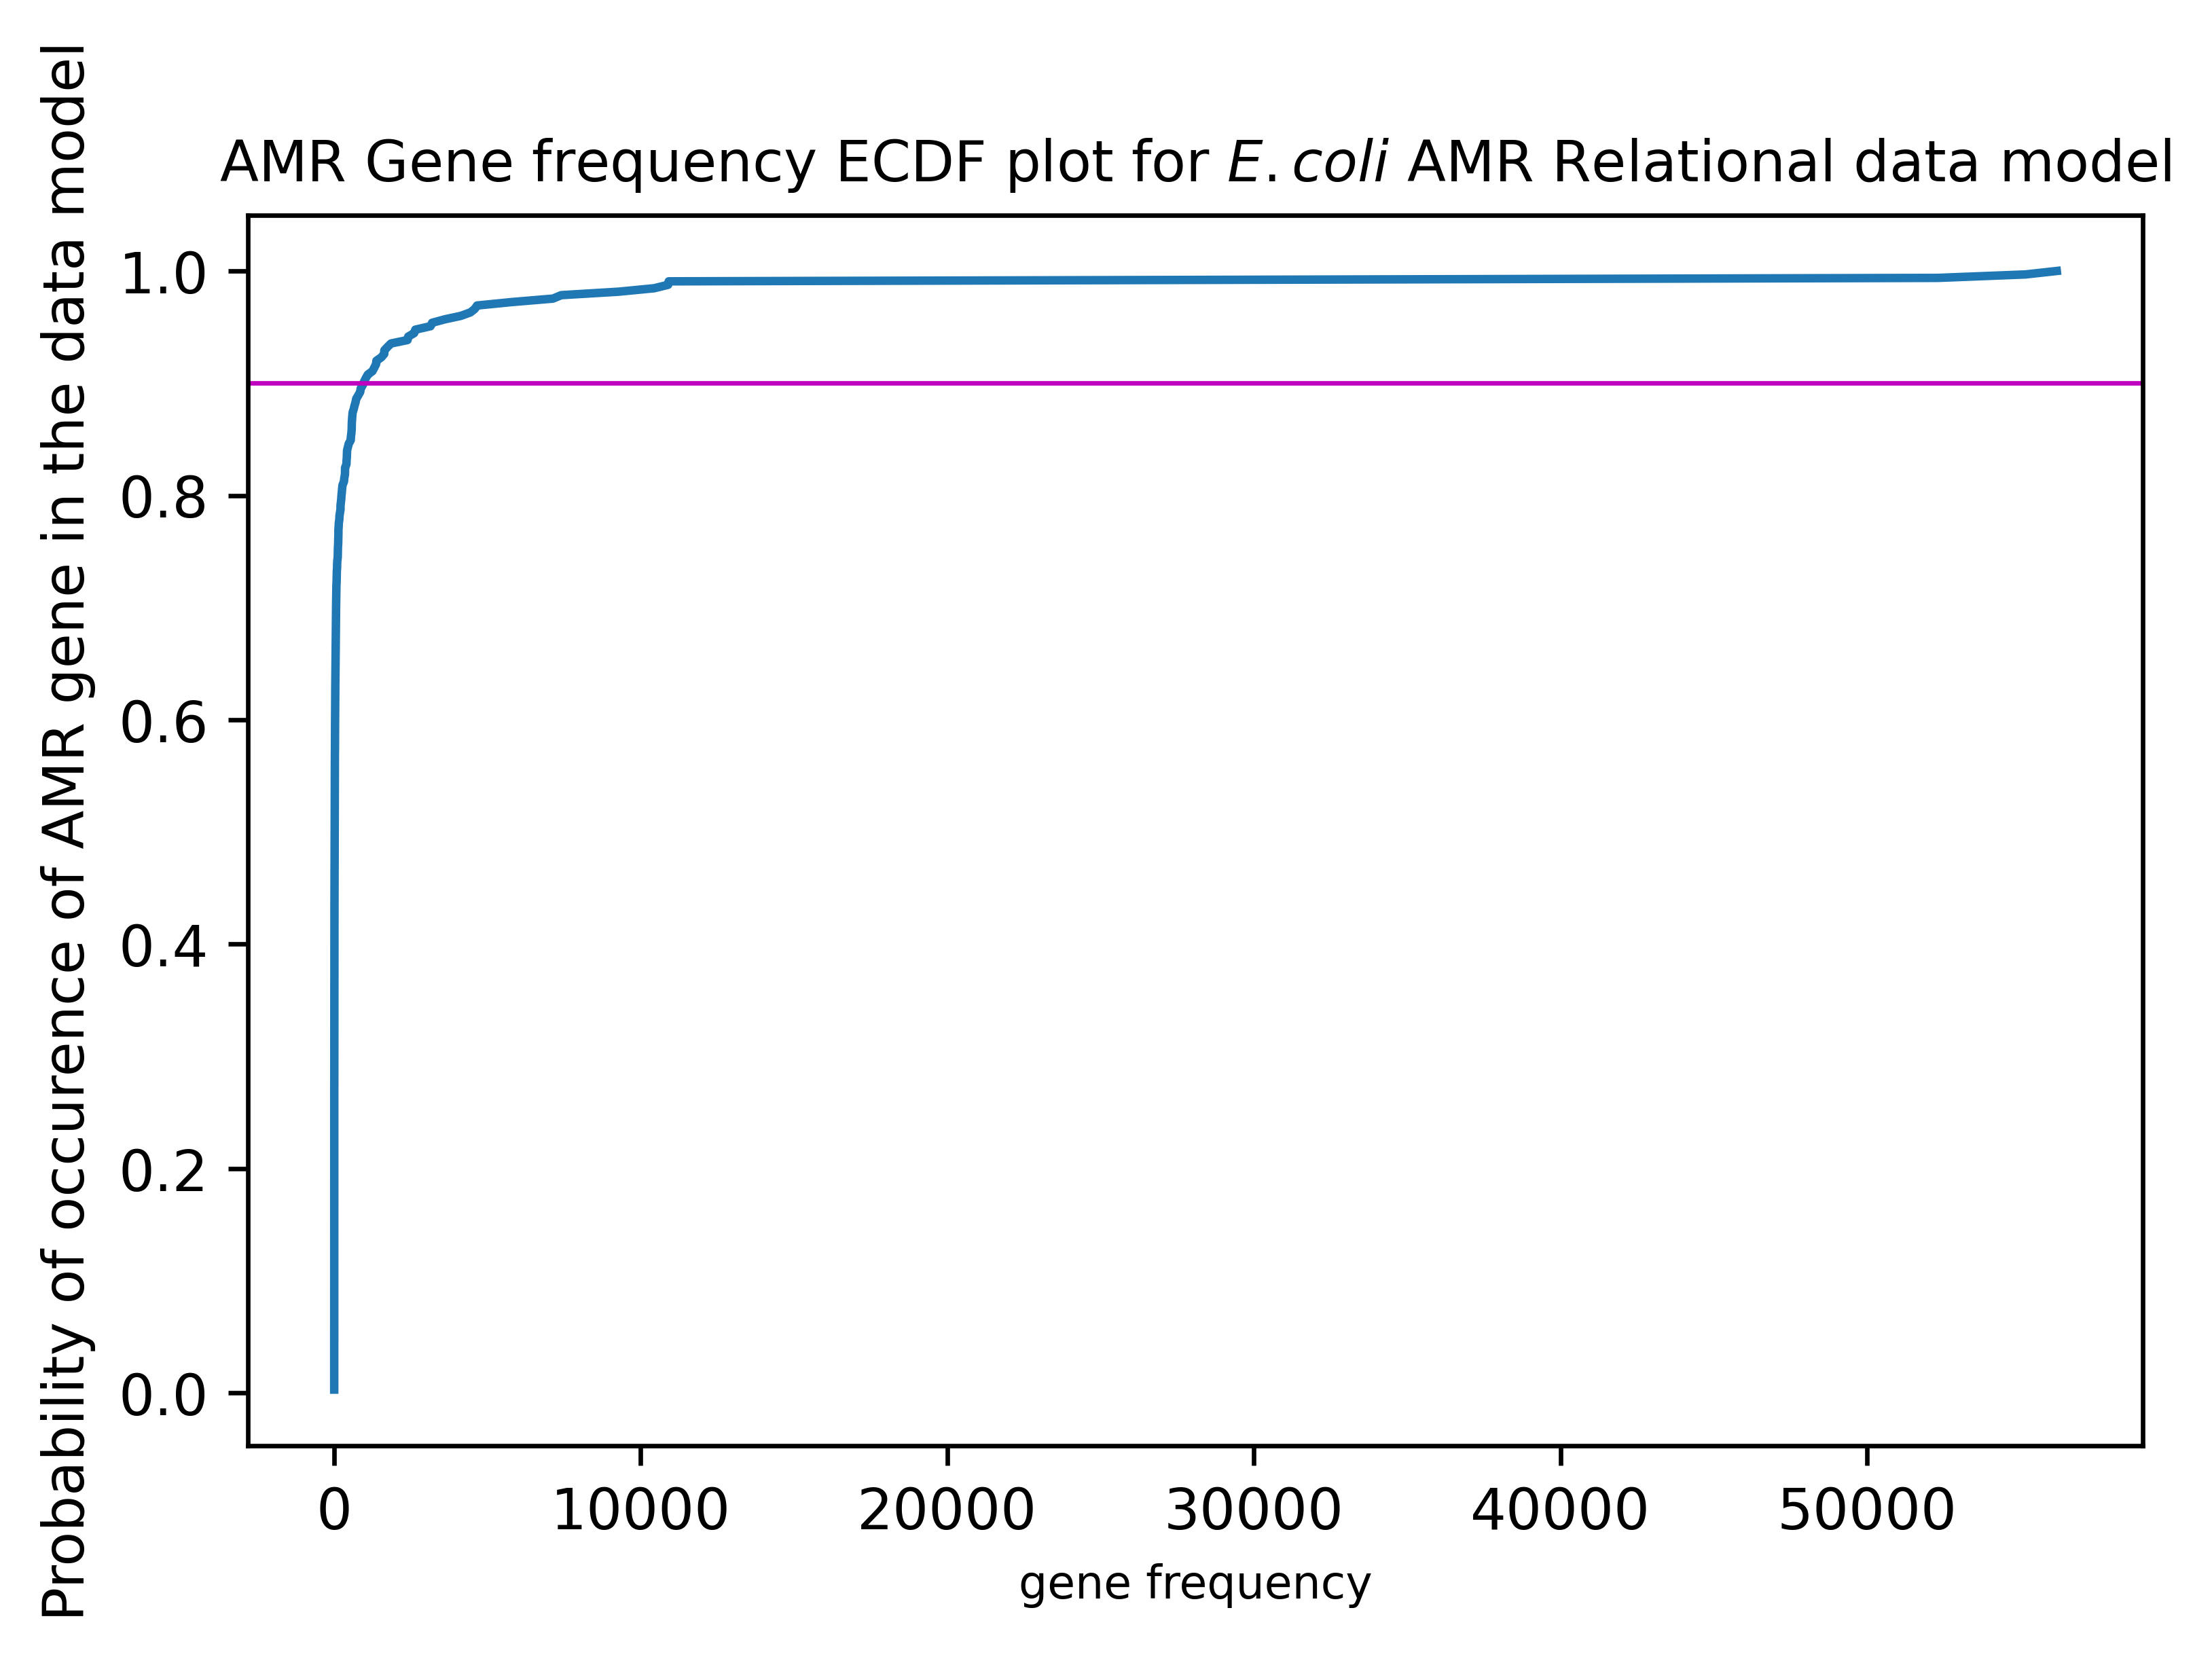

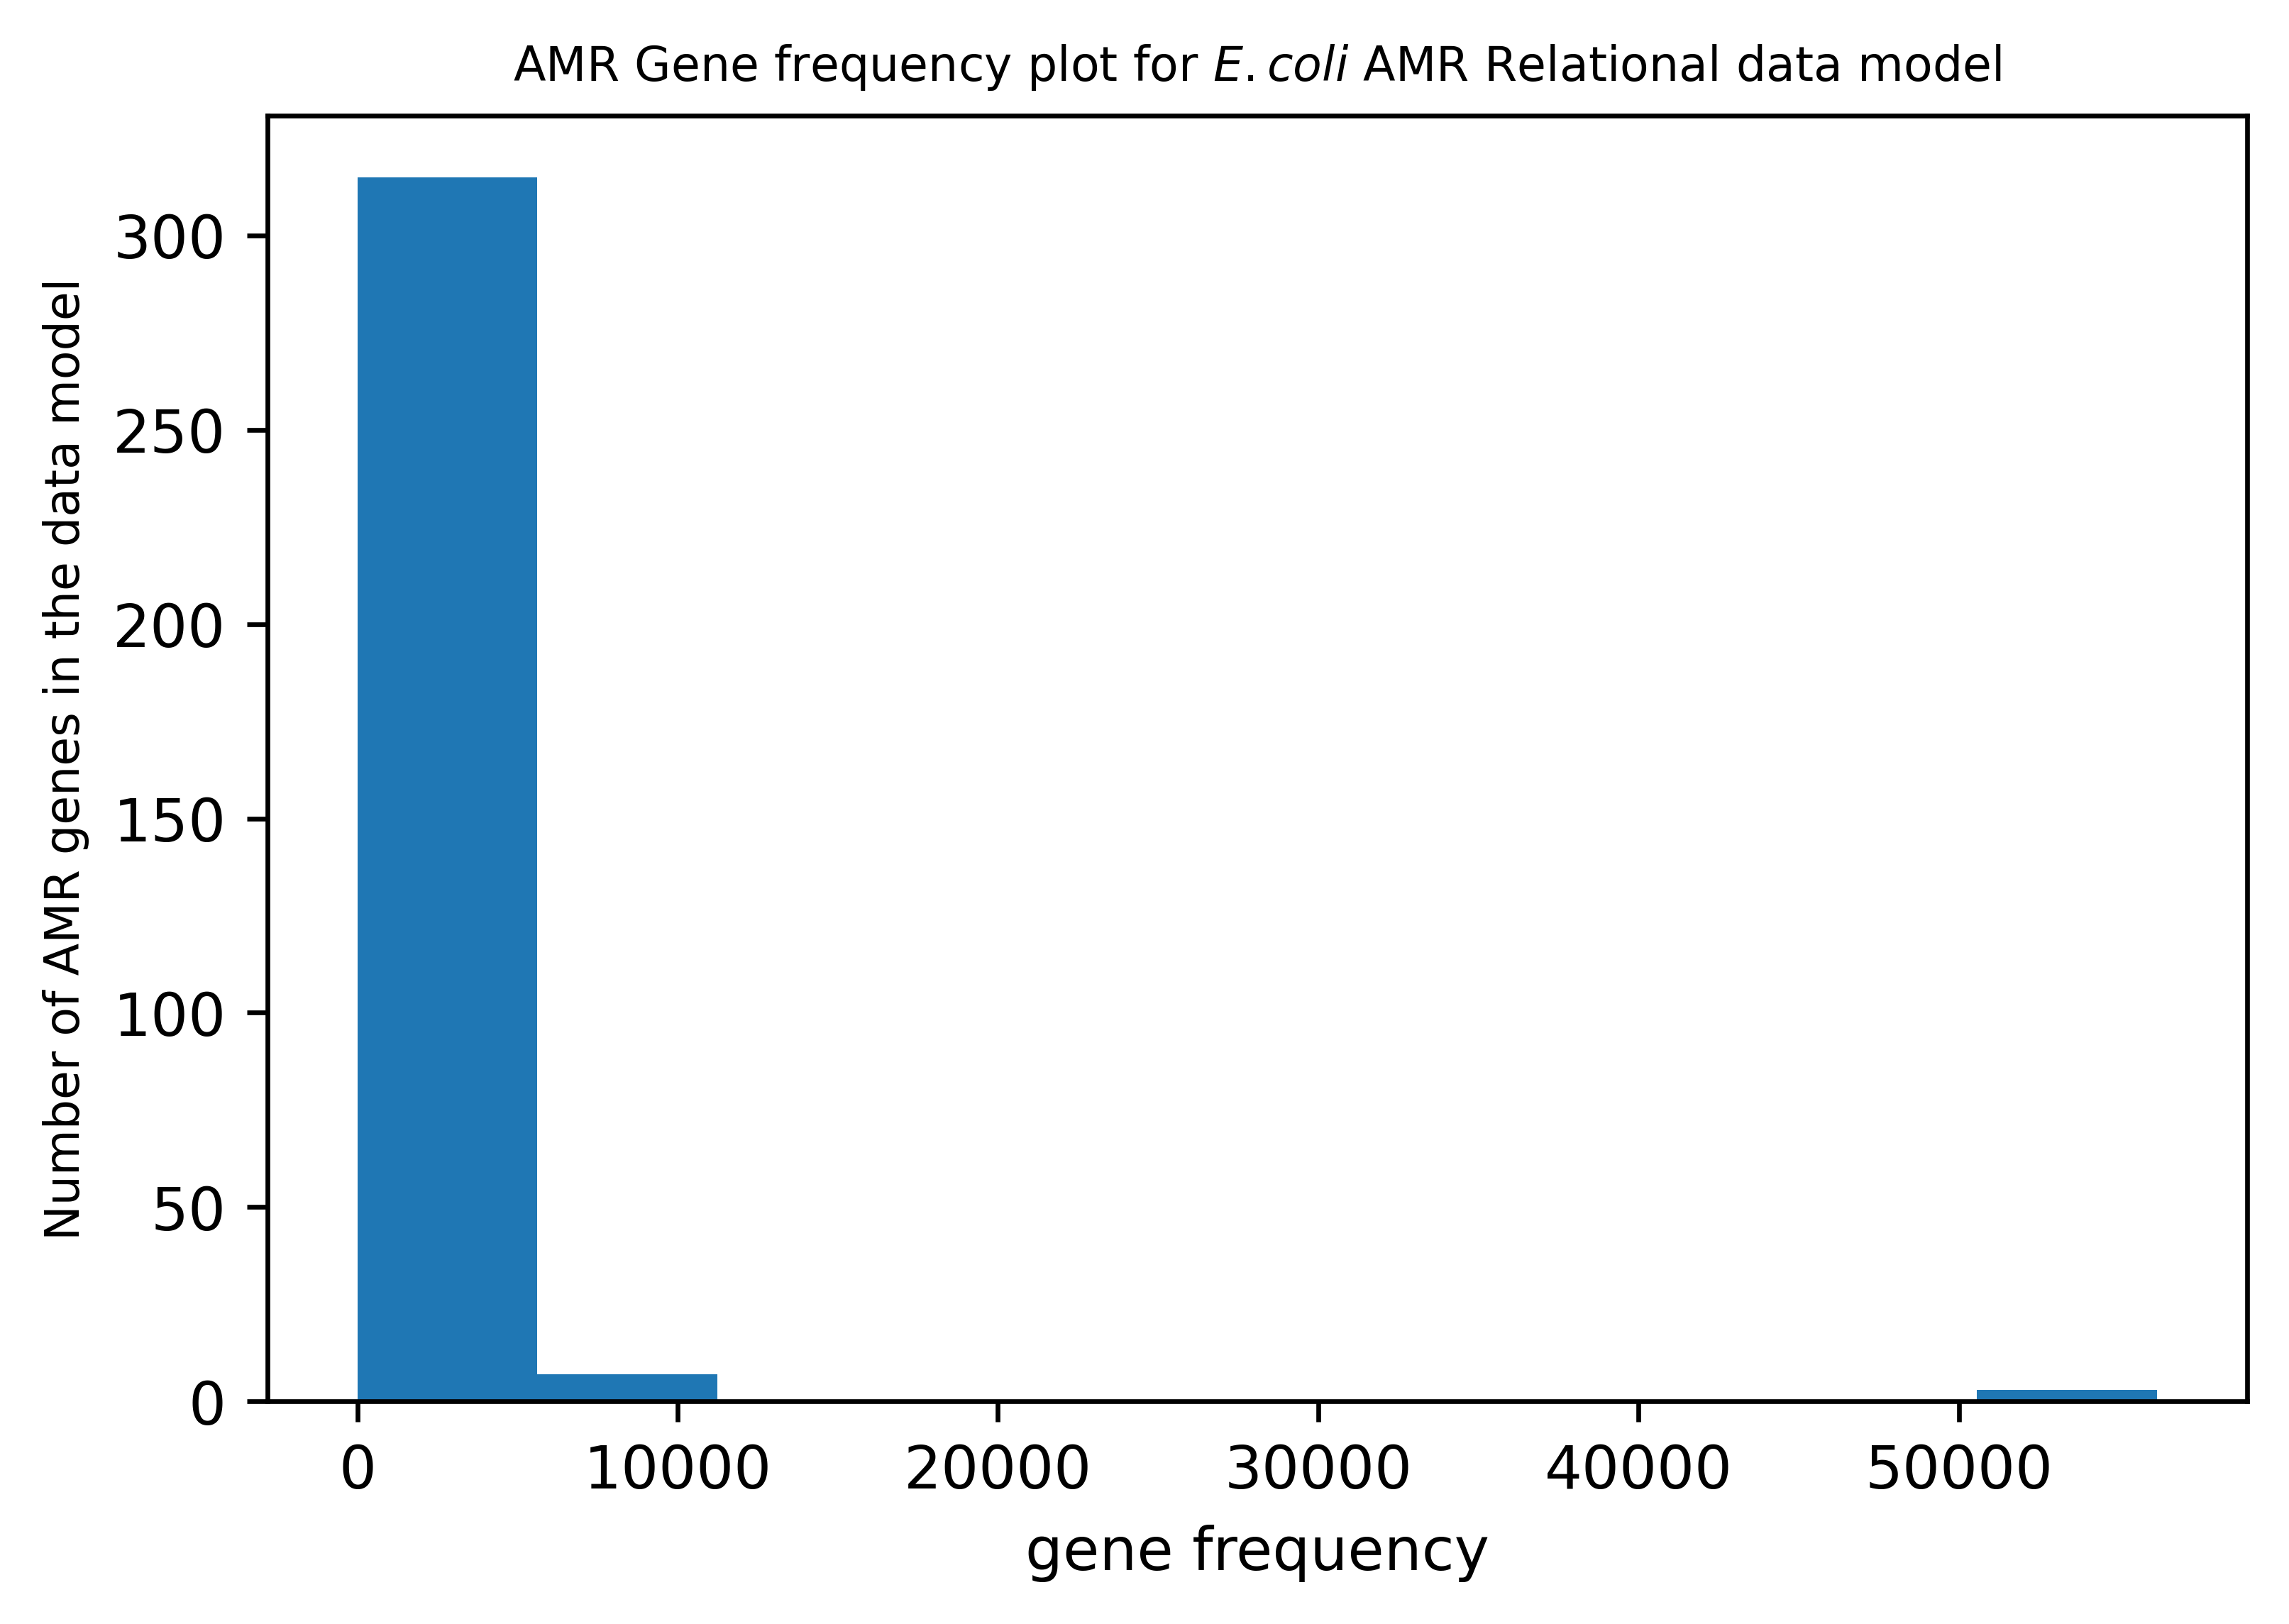

In [66]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
sample1 = np.array(df_gc["Gene_frequency"])
#sample2 = normal(loc=40, scale=5, size=700)
#sample = hstack((sample1, sample2))
# fit a cdf
ecdf = ECDF(sample1)

# get cumulative probability for values
print('P(x<100): %.3f' % ecdf(100))
print('P(x<500): %.3f' % ecdf(500))
print('P(x<1200): %.3f' % ecdf(1200))
# plot the cdf
pyplot.plot(ecdf.x, ecdf.y)
plt.title("AMR Gene frequency ECDF plot for $\it{E.coli}$ AMR Relational data model",fontsize=10)
plt.ylabel("Probability of occurence of AMR gene in the data model",fontsize=10)
plt.xlabel("gene frequency",fontsize=8)
plt.axhline(y=0.9, color='m', linewidth= 0.8)
#plt.savefig("/Users/jha/Documents/Spring2021/SPR_indot/graphs/Recdf12.pdf", dpi=900)
pyplot.show()
plt.title("AMR Gene frequency plot for $\it{E.coli}$ AMR Relational data model",fontsize=8)
plt.ylabel("Number of AMR genes in the data model",fontsize=8)
plt.xlabel("gene frequency", fontsize=10)
pyplot.hist(sample1)
#plt.savefig("path/name_of_file.pdf", dpi=600)

pyplot.show()

## installing modules in jupyter kernel
  ### Depends on the python version you are using and also if conda or pip
   [Reference](http://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/index.html)

In [65]:
import sys
!{sys.executable} -m pip install statsmodels 

  Using cached statsmodels-0.12.2.tar.gz (17.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
  Using cached scipy-1.7.0-cp39-cp39-macosx_10_9_x86_64.whl (32.1 MB)
  Created wheel for statsmodels: filename=statsmodels-0.12.2-cp39-cp39-macosx_10_14_x86_64.whl size=9774212 sha256=fa6d612b01a578d7b2eddc6155a11432d04cd7b67553cd2aecfa149033aa8e31
  Stored in directory: /Users/jhasneha/Library/Caches/pip/wheels/67/b0/c0/ad8553ba202becfa40aa86dafa3d266beaf7ab214eeb985e4d
Successfully built statsmodels
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [67]:
ecdf_lim=1200
df_gc = df_gc[df_gc["Gene_frequency"] >=ecdf_lim] 
list_impgenes=list(df_gc["AMR_gene"])
df_gc=df_gc.set_index("AMR_gene")

In [68]:
df_gc.head()

,Gene_frequency
AMR_gene,
aac(3)-VIa,1308.0
aadA1,4662.0
aadA2,1636.0
aadA5,1740.0
acrF,55168.0


Text(0.5, 1.0, 'Gene frequency plot of the important genes')

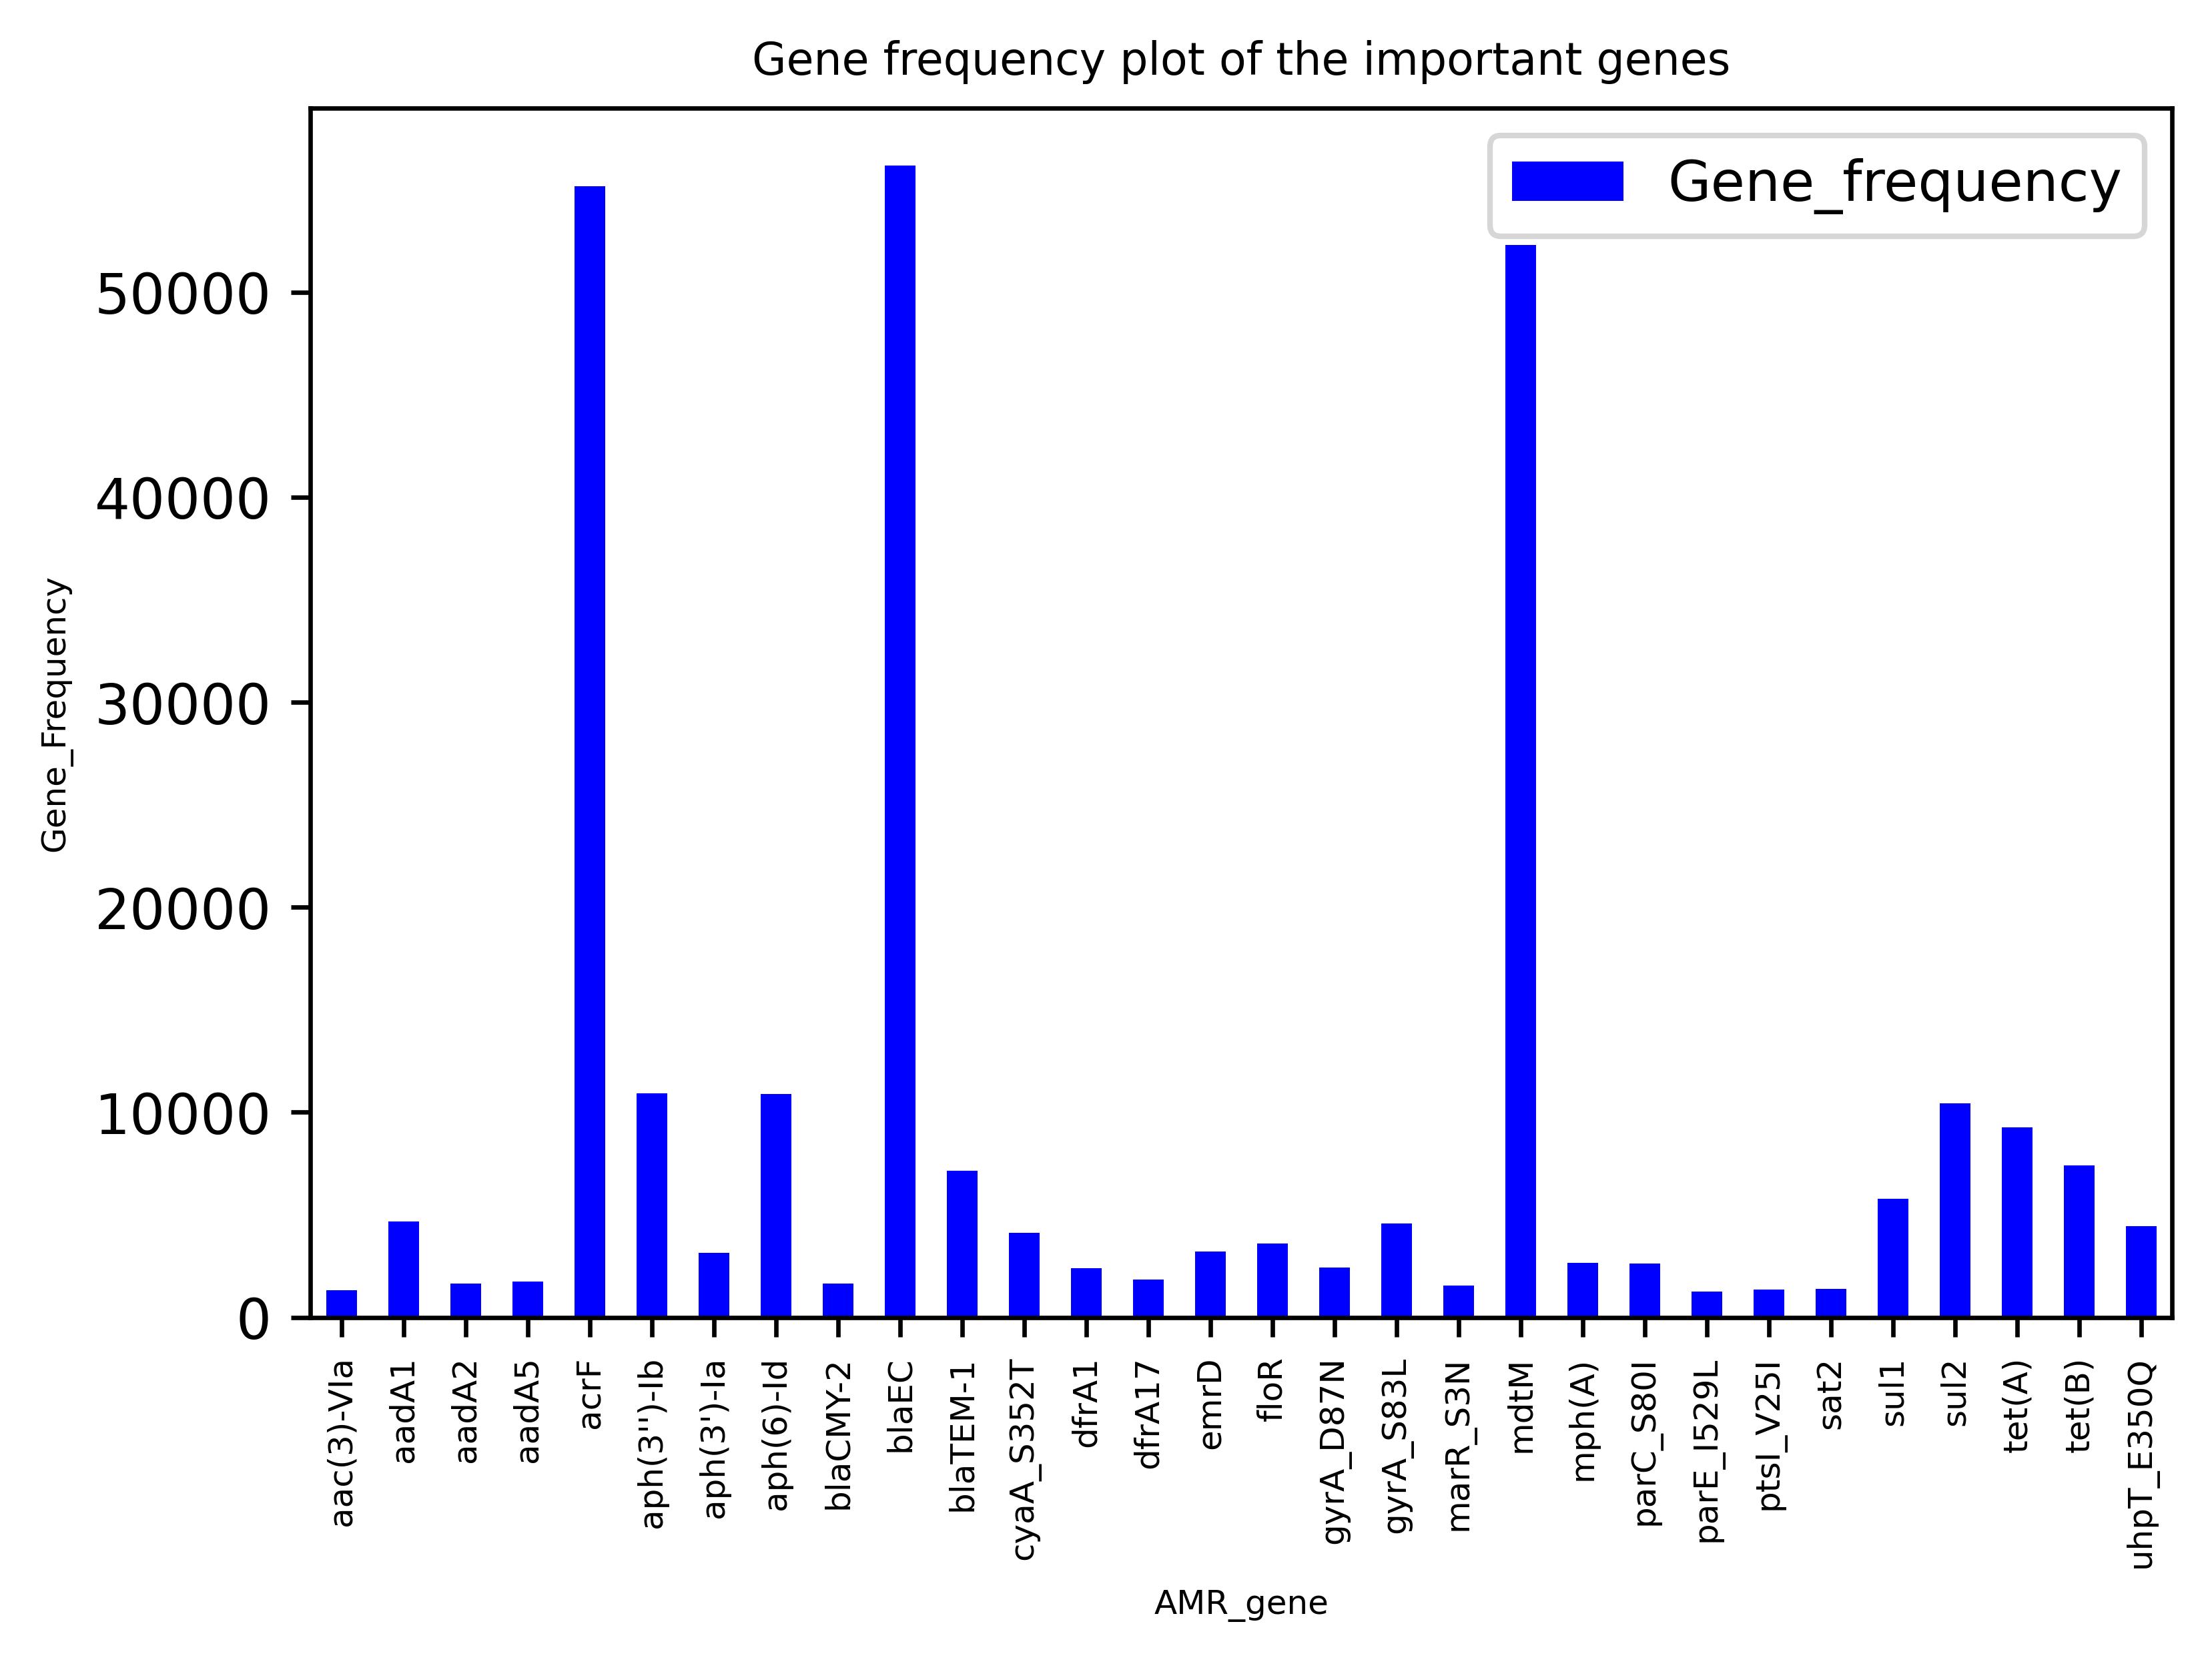

In [69]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600 # keeps the map image in high definition
ax=df_gc.plot.bar(color = "blue") #the dataframe object plots according to its index
plt.legend(loc='upper right')
plt.ylabel('Gene_Frequency', fontsize=6)
plt.xlabel("AMR_gene",fontsize=6)
plt.xticks(fontsize=6)
plt.title("Gene frequency plot of the important genes", fontsize=8)

In [70]:
df_tf=gene_frequency(list_ast,df_mainC)
df_tf= df_tf.drop(["ND","SDD"], axis=1)
df_tf = df_tf.replace(np.nan, 0)  
df_tf["Non-Susceptible"]= df_tf["I"]+df_tf["R"]
df_tf= df_tf.drop(["I","R"], axis=1)

xdf piperacillin-tazobactam  I  ND  R  S                 AMR_gene
Isolate                                                      
PDT000027739.2           0   0  1  0  piperacillin-tazobactam
PDT000040724.3           0   0  0  1  piperacillin-tazobactam
PDT000042707.1           0   0  0  1  piperacillin-tazobactam
PDT000046394.3           0   0  0  1  piperacillin-tazobactam
PDT000063325.3           0   0  0  1  piperacillin-tazobactam
...                     ..  .. .. ..                      ...
PDT000989113.1           0   0  1  0  piperacillin-tazobactam
PDT000989137.1           0   0  1  0  piperacillin-tazobactam
PDT000989174.1           0   0  1  0  piperacillin-tazobactam
PDT001016468.1           1   0  0  0  piperacillin-tazobactam
PDT001074477.1           0   0  1  0  piperacillin-tazobactam

[179 rows x 5 columns]

xdf ceftriaxone     I  R  S     AMR_gene
Isolate                             
PDT000002971.3  0  0  1  ceftriaxone
PDT000002973.3  0  0  1  ceftriaxone
PDT000003664.

In [71]:
df_tc=df_tf.groupby(['AMR_gene']).sum()
df_tc=df_tc.reset_index() #flattens the column name

In [73]:
df_tc=df_tc.rename(columns={'AMR_gene':'Antimicrobial'})
df_tc=df_tc.rename(columns={'S':'Susceptible'})
df_tc=df_tc.set_index("Antimicrobial")

In [74]:
df_tc.head(10)

,Susceptible,Non-Susceptible
Antimicrobial,,
amikacin,269.0,11.0
amoxicillin-clavulanic acid,146.0,136.0
ampicillin,57.0,322.0
ampicillin-sulbactam,3.0,24.0
azithromycin,102.0,1.0
aztreonam,37.0,133.0
cefazolin,11.0,219.0
cefepime,169.0,98.0
cefotaxime,8.0,43.0


In [75]:
def plot_ast(df,string, string2):
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = 600
    import matplotlib
    from matplotlib.cm import viridis
    ax=df.plot.bar(stacked=True)#the dataframe object plots according to its index
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')
    ax.set_ylabel('Number of isolates', fontsize=8)
    ax.set_xlabel(string2,fontsize=8)
    plt.xticks(fontsize=6, rotation=80)
    plt.title(string, fontsize=8)
    return (plt.show())


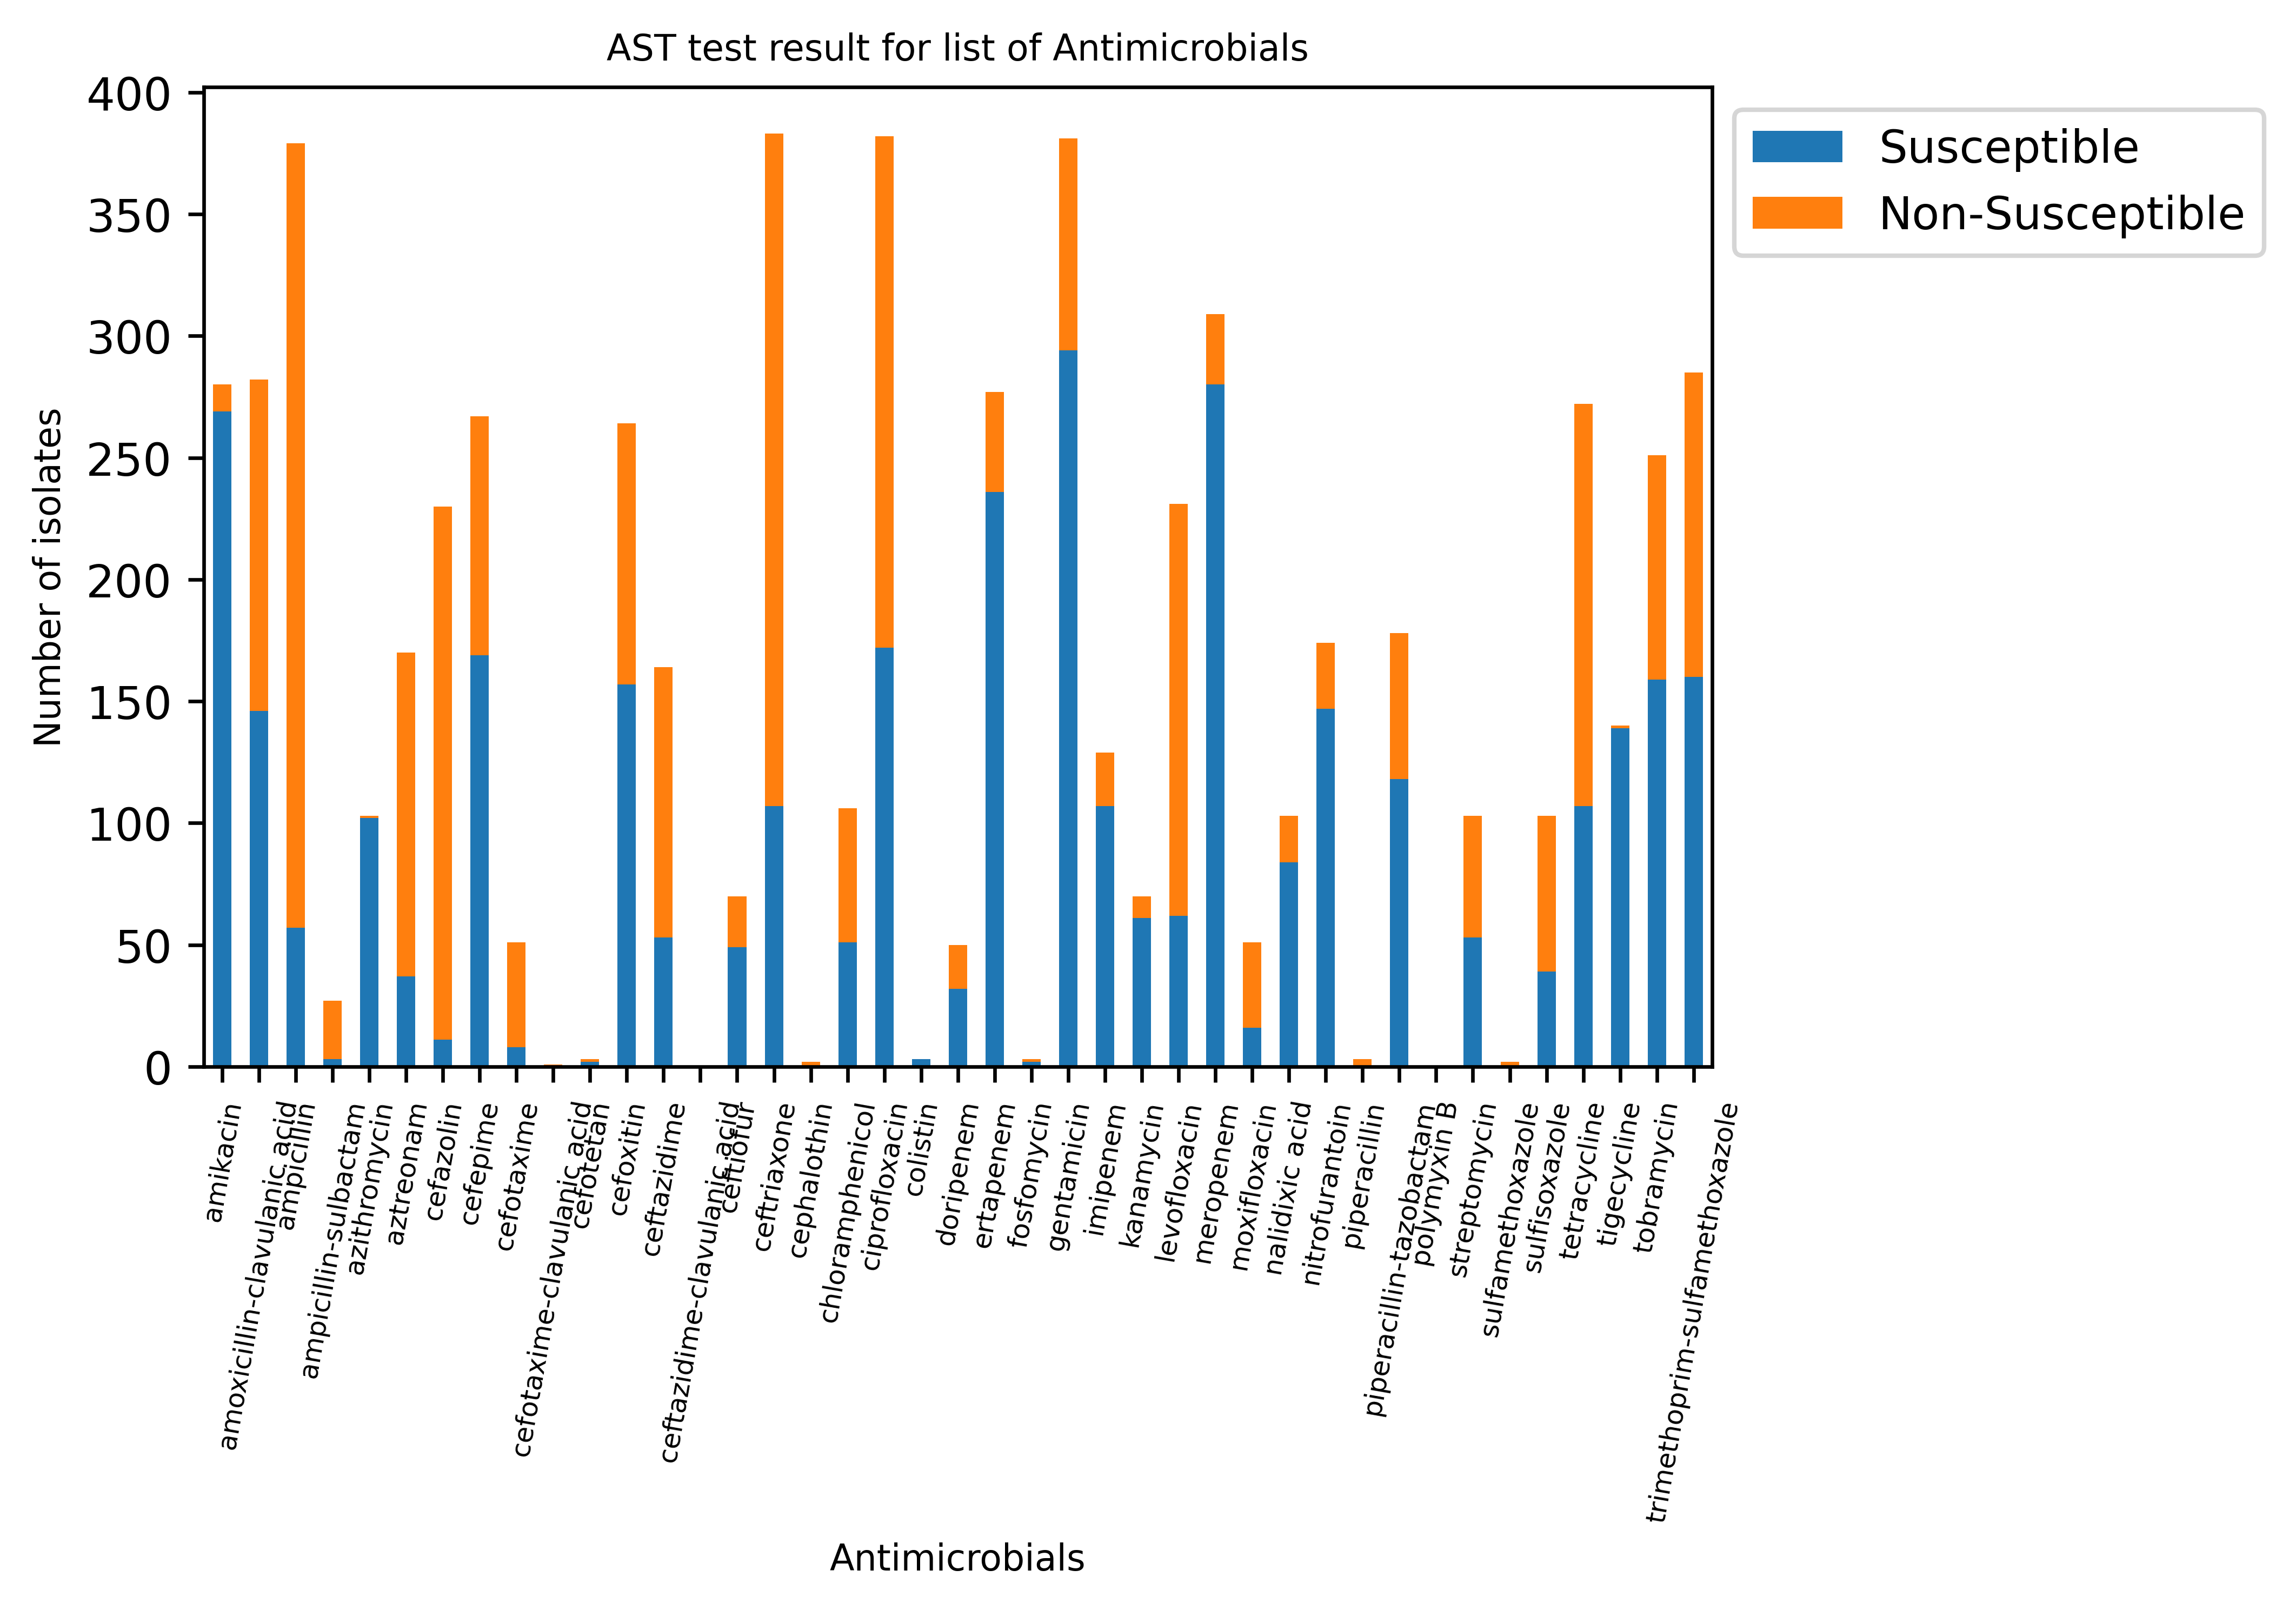

In [78]:
plot_ast(df_tc,"AST test result for list of Antimicrobials","Antimicrobials")

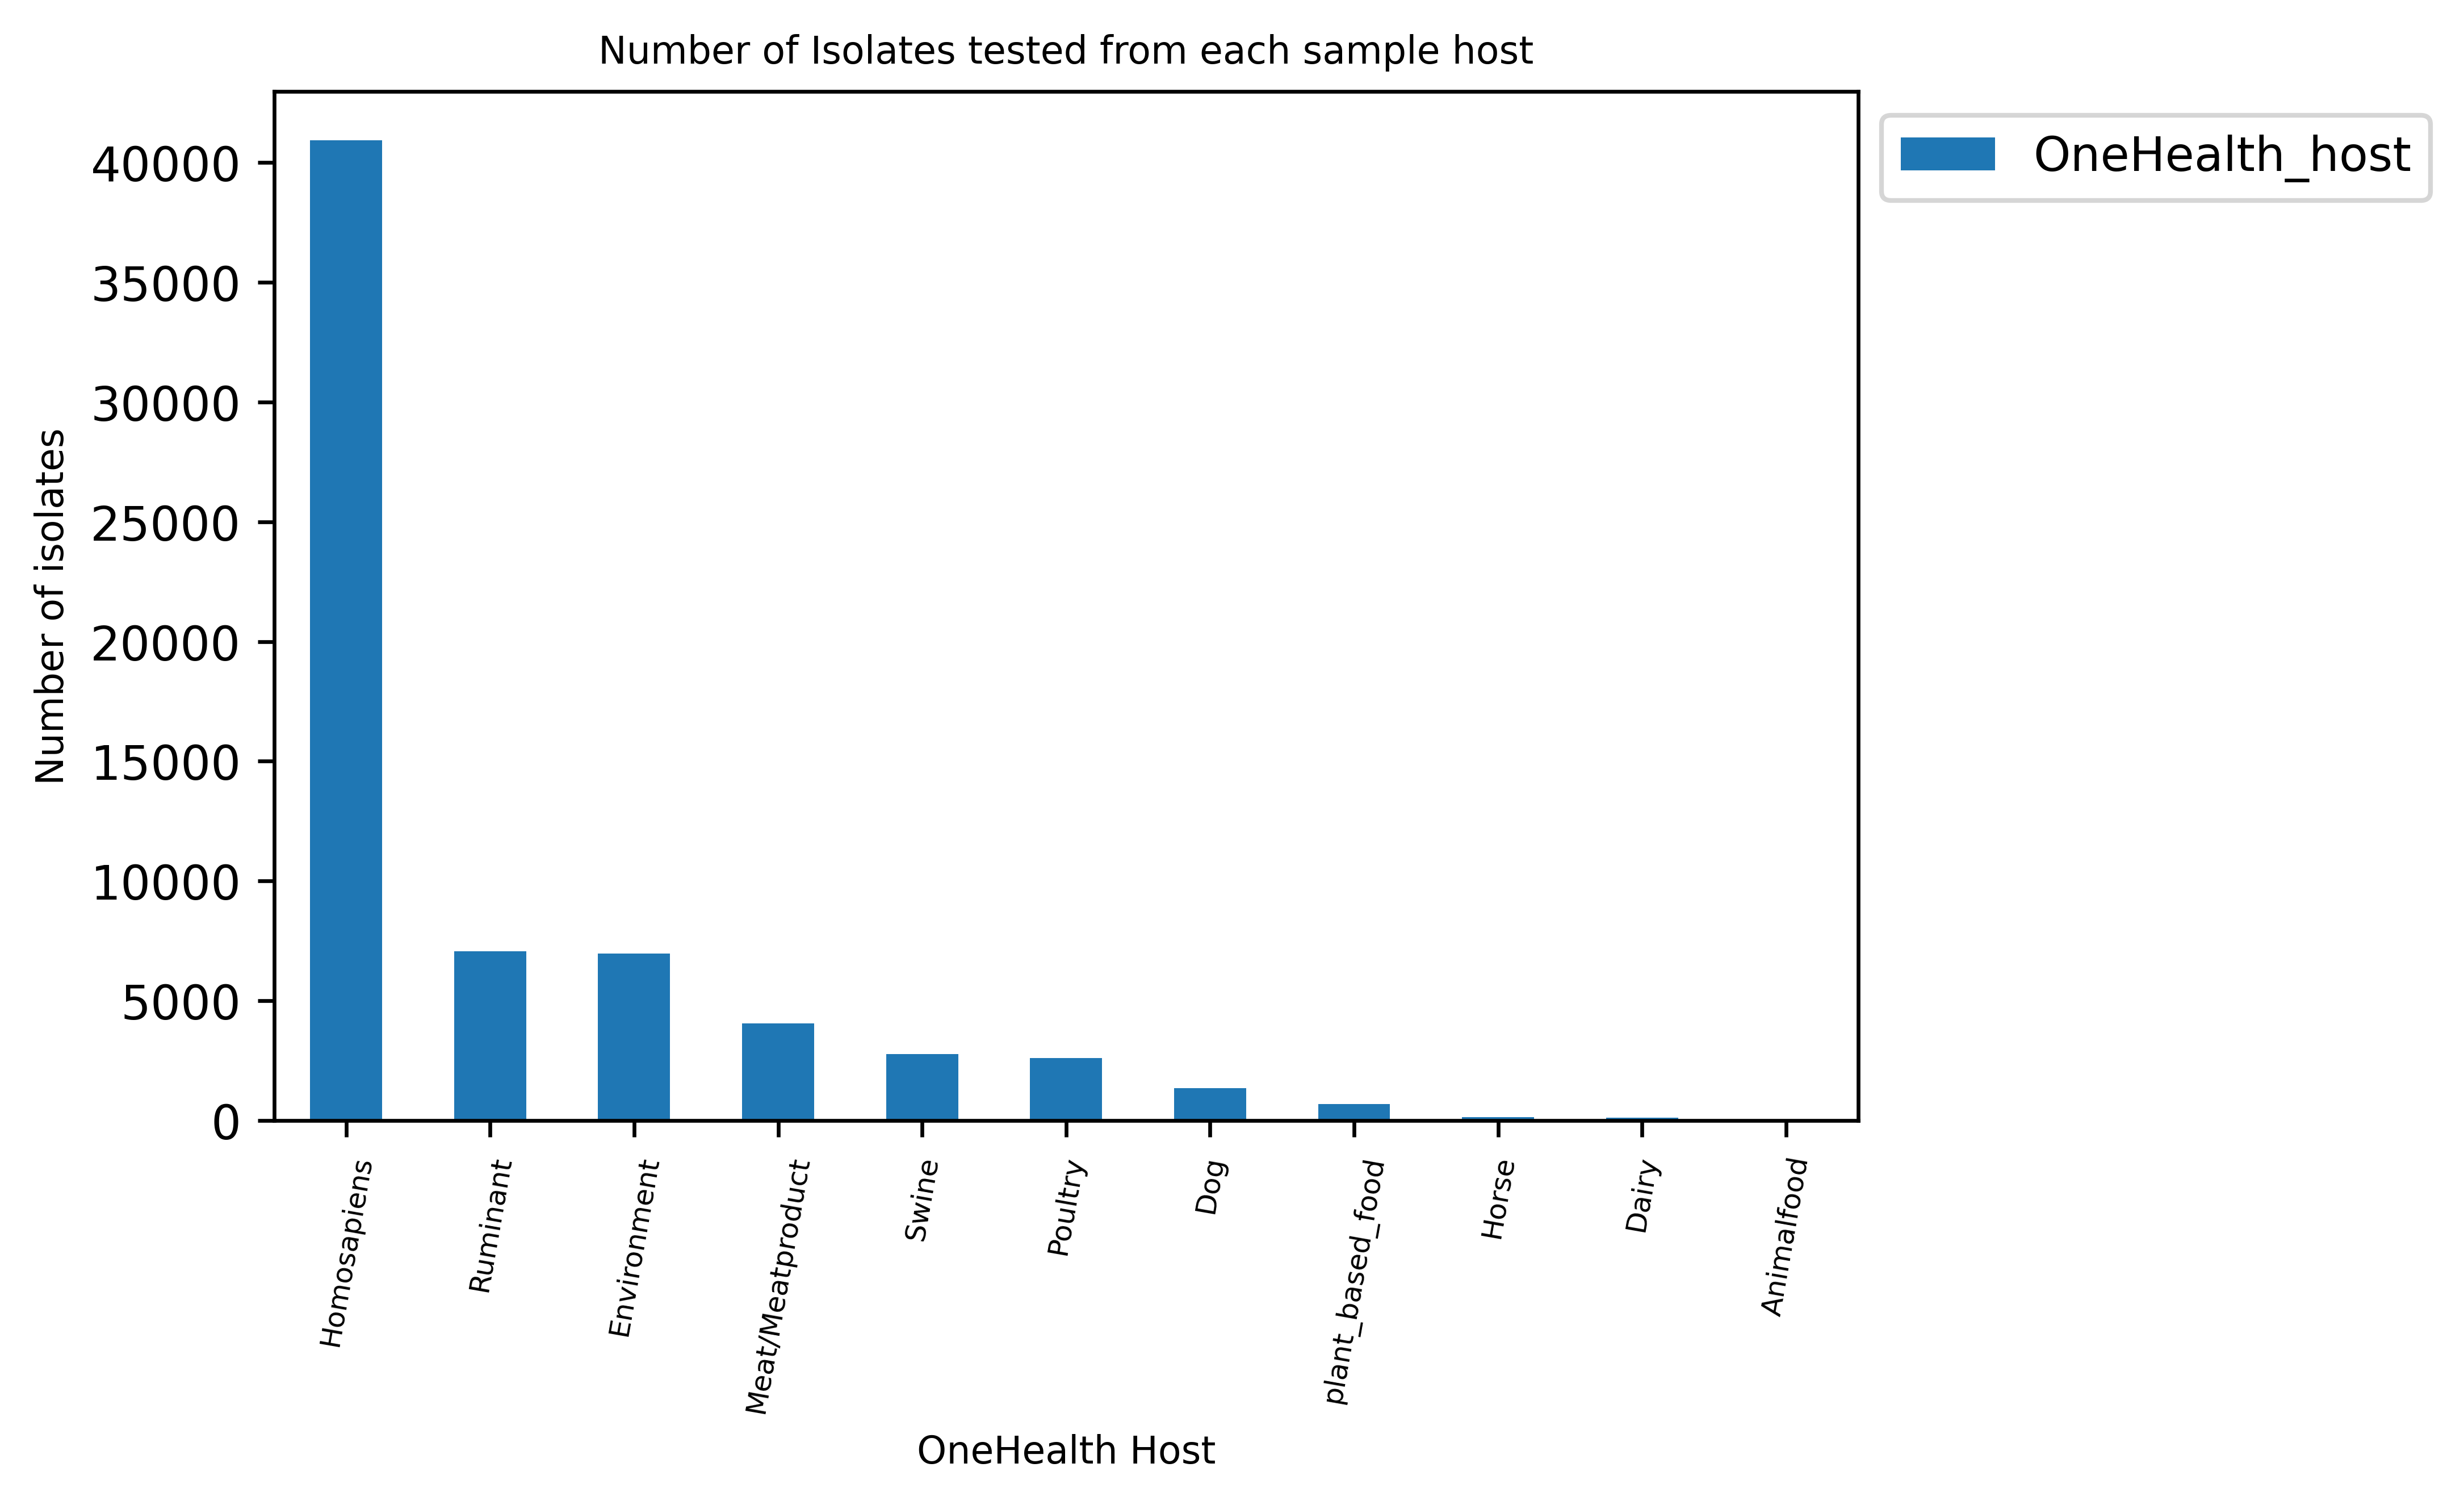

In [81]:
# can use the funtion to plot the collection date, location and onehealth_host
df_sh=df_mainC["OneHealth_host"].value_counts()
plot_ast(df_sh,"Number of Isolates tested from each sample host","OneHealth Host")


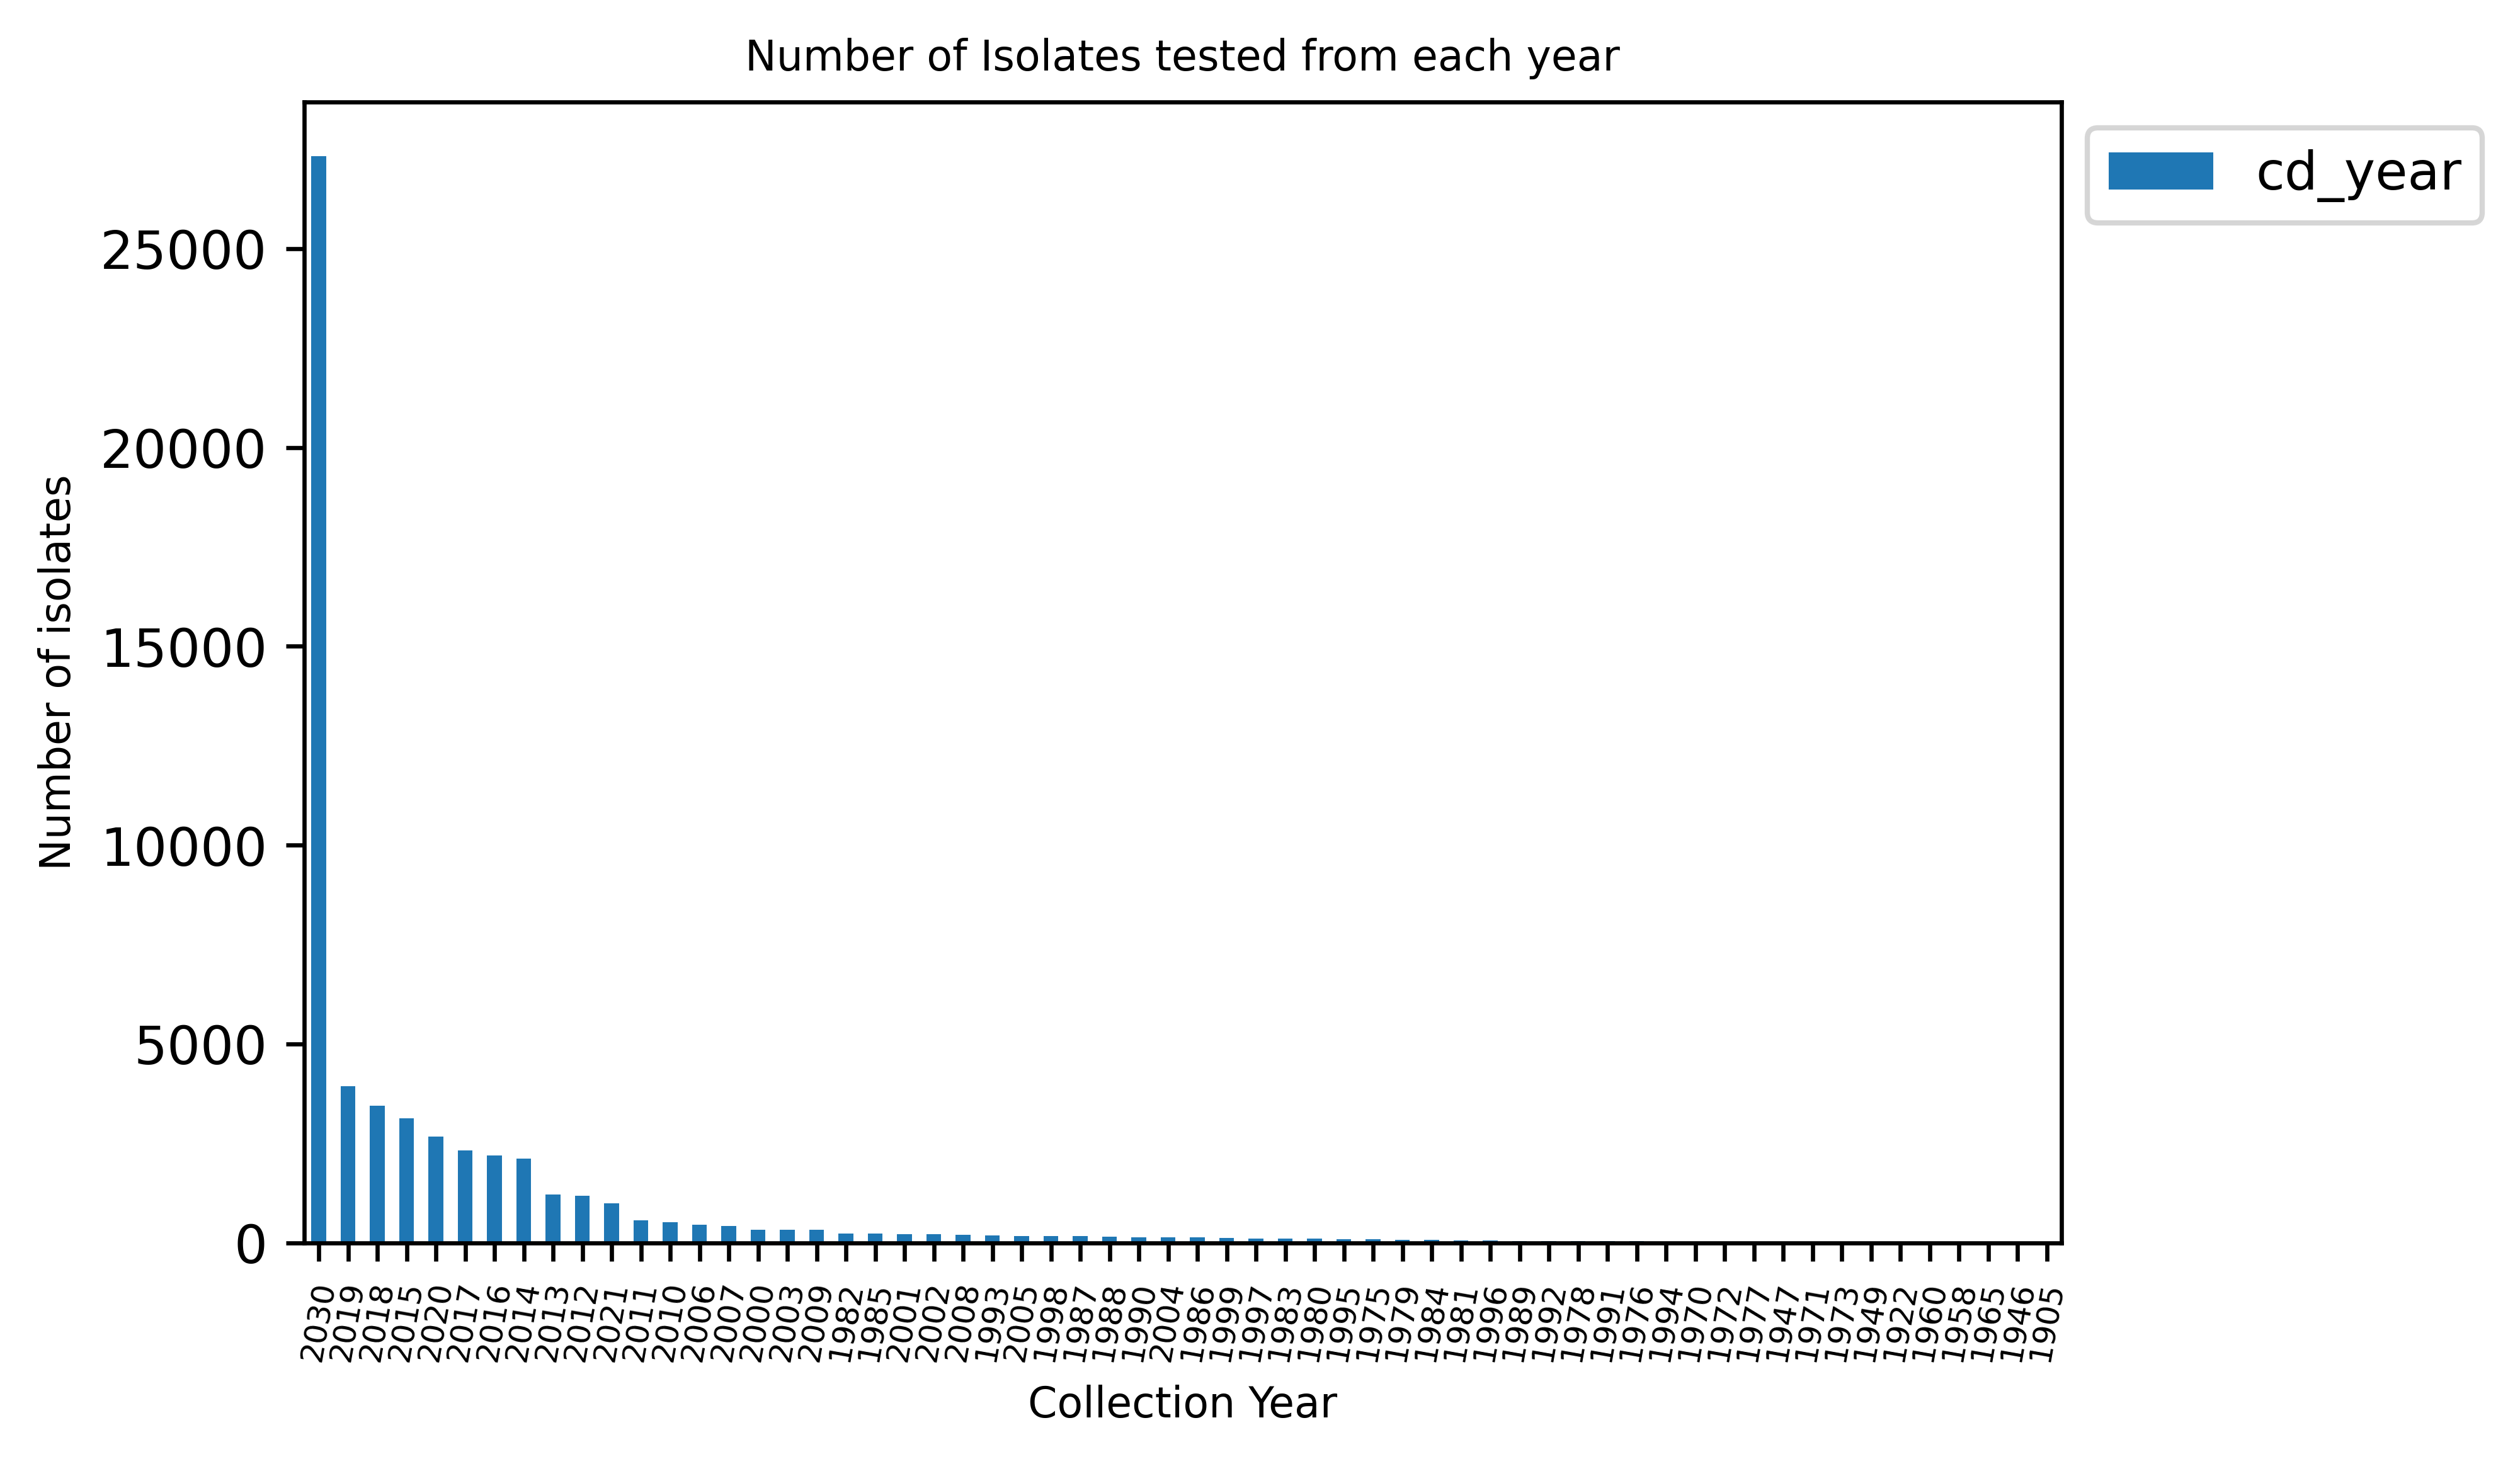

In [82]:
df_cd=df_mainC["cd_year"].value_counts()
plot_ast(df_cd,"Number of Isolates tested from each year","Collection Year")

##Creating the table with all values for the analysis for important genes

In [83]:
df_imp=gene_frequency(list_impgenes,df_mainC)
df_imp=df_imp.reset_index()
df_imp = df_imp.replace( np.nan, 0) 
df_imp["Gene_frequency"]= df_imp.sum(axis=1)
df_imp= df_imp.drop(["MISTRANSLATION","PARTIAL","POINT","PARTIAL_END_OF_CONTIG","COMPLETE","Gene_frequency"], axis=1)

xdf aac(3)-VIa      COMPLETE  MISTRANSLATION  PARTIAL  PARTIAL_END_OF_CONTIG  \
Isolate                                                                    
PDT000003958.2         1               0        0                      0   
PDT000004018.2         1               0        0                      0   
PDT000004351.2         1               0        0                      0   
PDT000029746.3         1               0        0                      0   
PDT000032719.1         1               0        0                      0   
...                  ...             ...      ...                    ...   
PDT001072667.1         1               0        0                      0   
PDT001074763.1         1               0        0                      0   
PDT001074844.1         1               0        0                      0   
PDT001075821.1         1               0        0                      0   
PDT001075848.1         1               0        0                      0   

aac(3)-

In [84]:
def create_all(df_kleb,appended_data):
    isoyear_dict = dict(zip(df_kleb.Isolate, df_kleb.cd_year))
    appended_data['CD_year']=appended_data['Isolate'].map(isoyear_dict)
    isostate_dict = dict(zip(df_kleb.Isolate, df_kleb.Collection_state))
    appended_data['Collection_state']=appended_data['Isolate'].map(isostate_dict)
    isosamp_dict = dict(zip(df_kleb.Isolate, df_kleb.OneHealth_host))
    appended_data['OH_host']=appended_data['Isolate'].map(isosamp_dict)
    return(appended_data)
df_imp_all=create_all(df_mainC,df_imp)


In [86]:
df_imp_all.head(50)

,Isolate,AMR_gene,CD_year,Collection_state,OH_host
0,PDT000003958.2,aac(3)-VIa,2017,Arizona,Meat/Meatproduct
1,PDT000004018.2,aac(3)-VIa,2020,Arizona,Meat/Meatproduct
2,PDT000004351.2,aac(3)-VIa,2020,Louisiana,Meat/Meatproduct
3,PDT000029746.3,aac(3)-VIa,2015,New York,plant_based_food
4,PDT000032719.1,aac(3)-VIa,2019,Mississippi,Homosapiens
5,PDT000041462.3,aac(3)-VIa,2017,NaN,Homosapiens
6,PDT000042478.1,aac(3)-VIa,2014,Washington,Homosapiens
7,PDT000049077.3,aac(3)-VIa,2015,NaN,Homosapiens
8,PDT000049341.3,aac(3)-VIa,2017,NaN,Homosapiens
9,PDT000062939.2,aac(3)-VIa,2012,NaN,Homosapiens


In [87]:
df_imp_all.tail(50)

,Isolate,AMR_gene,CD_year,Collection_state,OH_host
277034,PDT001049726.1,uhpT_E350Q,2018,Tennessee,Environment
277035,PDT001049733.1,uhpT_E350Q,2018,Pennsylvania,Environment
277036,PDT001049749.1,uhpT_E350Q,2018,Colorado,Environment
277037,PDT001049832.1,uhpT_E350Q,2015,NaN,Homosapiens
277038,PDT001049893.1,uhpT_E350Q,2015,NaN,Homosapiens
277039,PDT001049912.1,uhpT_E350Q,2015,NaN,Homosapiens
277040,PDT001056470.1,uhpT_E350Q,2018,USA: Philadelphia,Dog
277041,PDT001056532.1,uhpT_E350Q,2018,NaN,Homosapiens
277042,PDT001057061.1,uhpT_E350Q,2018,NaN,Homosapiens
277043,PDT001057207.1,uhpT_E350Q,2030,NaN,Homosapiens


### Pivot tables
[pandas Df.pivot_table reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

In [90]:
dfgsh = pd.pivot_table(df_imp_all,index=["OH_host"],columns=["AMR_gene"],values=["Isolate"],aggfunc=pd.Series.nunique, fill_value= 'None')
dfgsh.head()

Isolate                                                         \
AMR_gene    aac(3)-VIa   aadA1  aadA2   aadA5     acrF aph(3'')-Ib aph(3')-Ia   
OH_host                                                                         
Animalfood        None     1.0   None    None      1.0         1.0        1.0   
Dairy              3.0     8.0    2.0     3.0    120.0        18.0        8.0   
Dog               32.0   140.0   41.0    49.0   1288.0       294.0       65.0   
Environment      140.0   545.0  175.0   154.0   6084.0      1239.0      372.0   
Homosapiens      734.0  2473.0  946.0  1076.0  32645.0      6233.0     1781.0   

                                         ...                               \
AMR_gene    aph(6)-Id blaCMY-2    blaEC  ...  mph(A) parC_S80I parE_I529L   
OH_host                                  ...                                
Animalfood        1.0     None      1.0  ...    None      None       None   
Dairy            17.0      1.0    121.0  ...     3.0       6.0        6.0   
Dog             293.0     47.0   1291.0  ...    61.0      55.0       25.0   
Environment    1238.0    196.0   6156.0  ...   234.0     227.0      120.0   
Homosapiens    6222.0    936.0  33296.0  ...  1682.0    1665.0      809.0   

                                                                         
AMR_gene    ptsI_V25I   sat2    sul1    sul2  tet(A)  tet(B) uhpT_E350Q  
OH_host                                                                  
Animalfood       None    1.0    None     1.0    None     1.0       None  
Dairy             6.0    2.0     8.0    17.0    18.0    19.0        8.0  
Dog              27.0   52.0   126.0   273.0   269.0   180.0      110.0  
Environment     134.0  136.0   612.0  1137.0   978.0   879.0      453.0  
Homosapiens     888.0  813.0  3254.0  6018.0  5247.0  4177.0     2740.0  

[5 rows x 30 columns]

In [91]:
dfgsh=dfgsh.reset_index()
dfgsh.columns = dfgsh.columns.droplevel()
dfgsh=dfgsh.rename(columns={dfgsh.columns[0]:'OH_host'})
dfgsh=dfgsh.drop(columns=["acrF","blaEC","mdtM"])
dfgsh=dfgsh.T
dfgsh.columns=dfgsh.iloc[0]
dfgsh=dfgsh.reset_index()
dfgsh=dfgsh.drop([0])
dfgsh=dfgsh.set_index("AMR_gene")
dfgsh.head()

OH_host,Animalfood,Dairy,Dog,Environment,Homosapiens,Horse,Meat/Meatproduct,Poultry,Ruminant,Swine,plant_based_food
AMR_gene,,,,,,,,,,,
aac(3)-VIa,None,3.0,32.0,140.0,734.0,3.0,77.0,77.0,166.0,60.0,16.0
aadA1,1.0,8.0,140.0,545.0,2473.0,17.0,435.0,282.0,504.0,220.0,37.0
aadA2,None,2.0,41.0,175.0,946.0,6.0,93.0,77.0,201.0,81.0,14.0
aadA5,None,3.0,49.0,154.0,1076.0,2.0,96.0,73.0,202.0,73.0,12.0
aph(3'')-Ib,1.0,18.0,294.0,1239.0,6233.0,31.0,810.0,513.0,1167.0,497.0,109.0


Text(0.5, 0, 'AMR_genes')

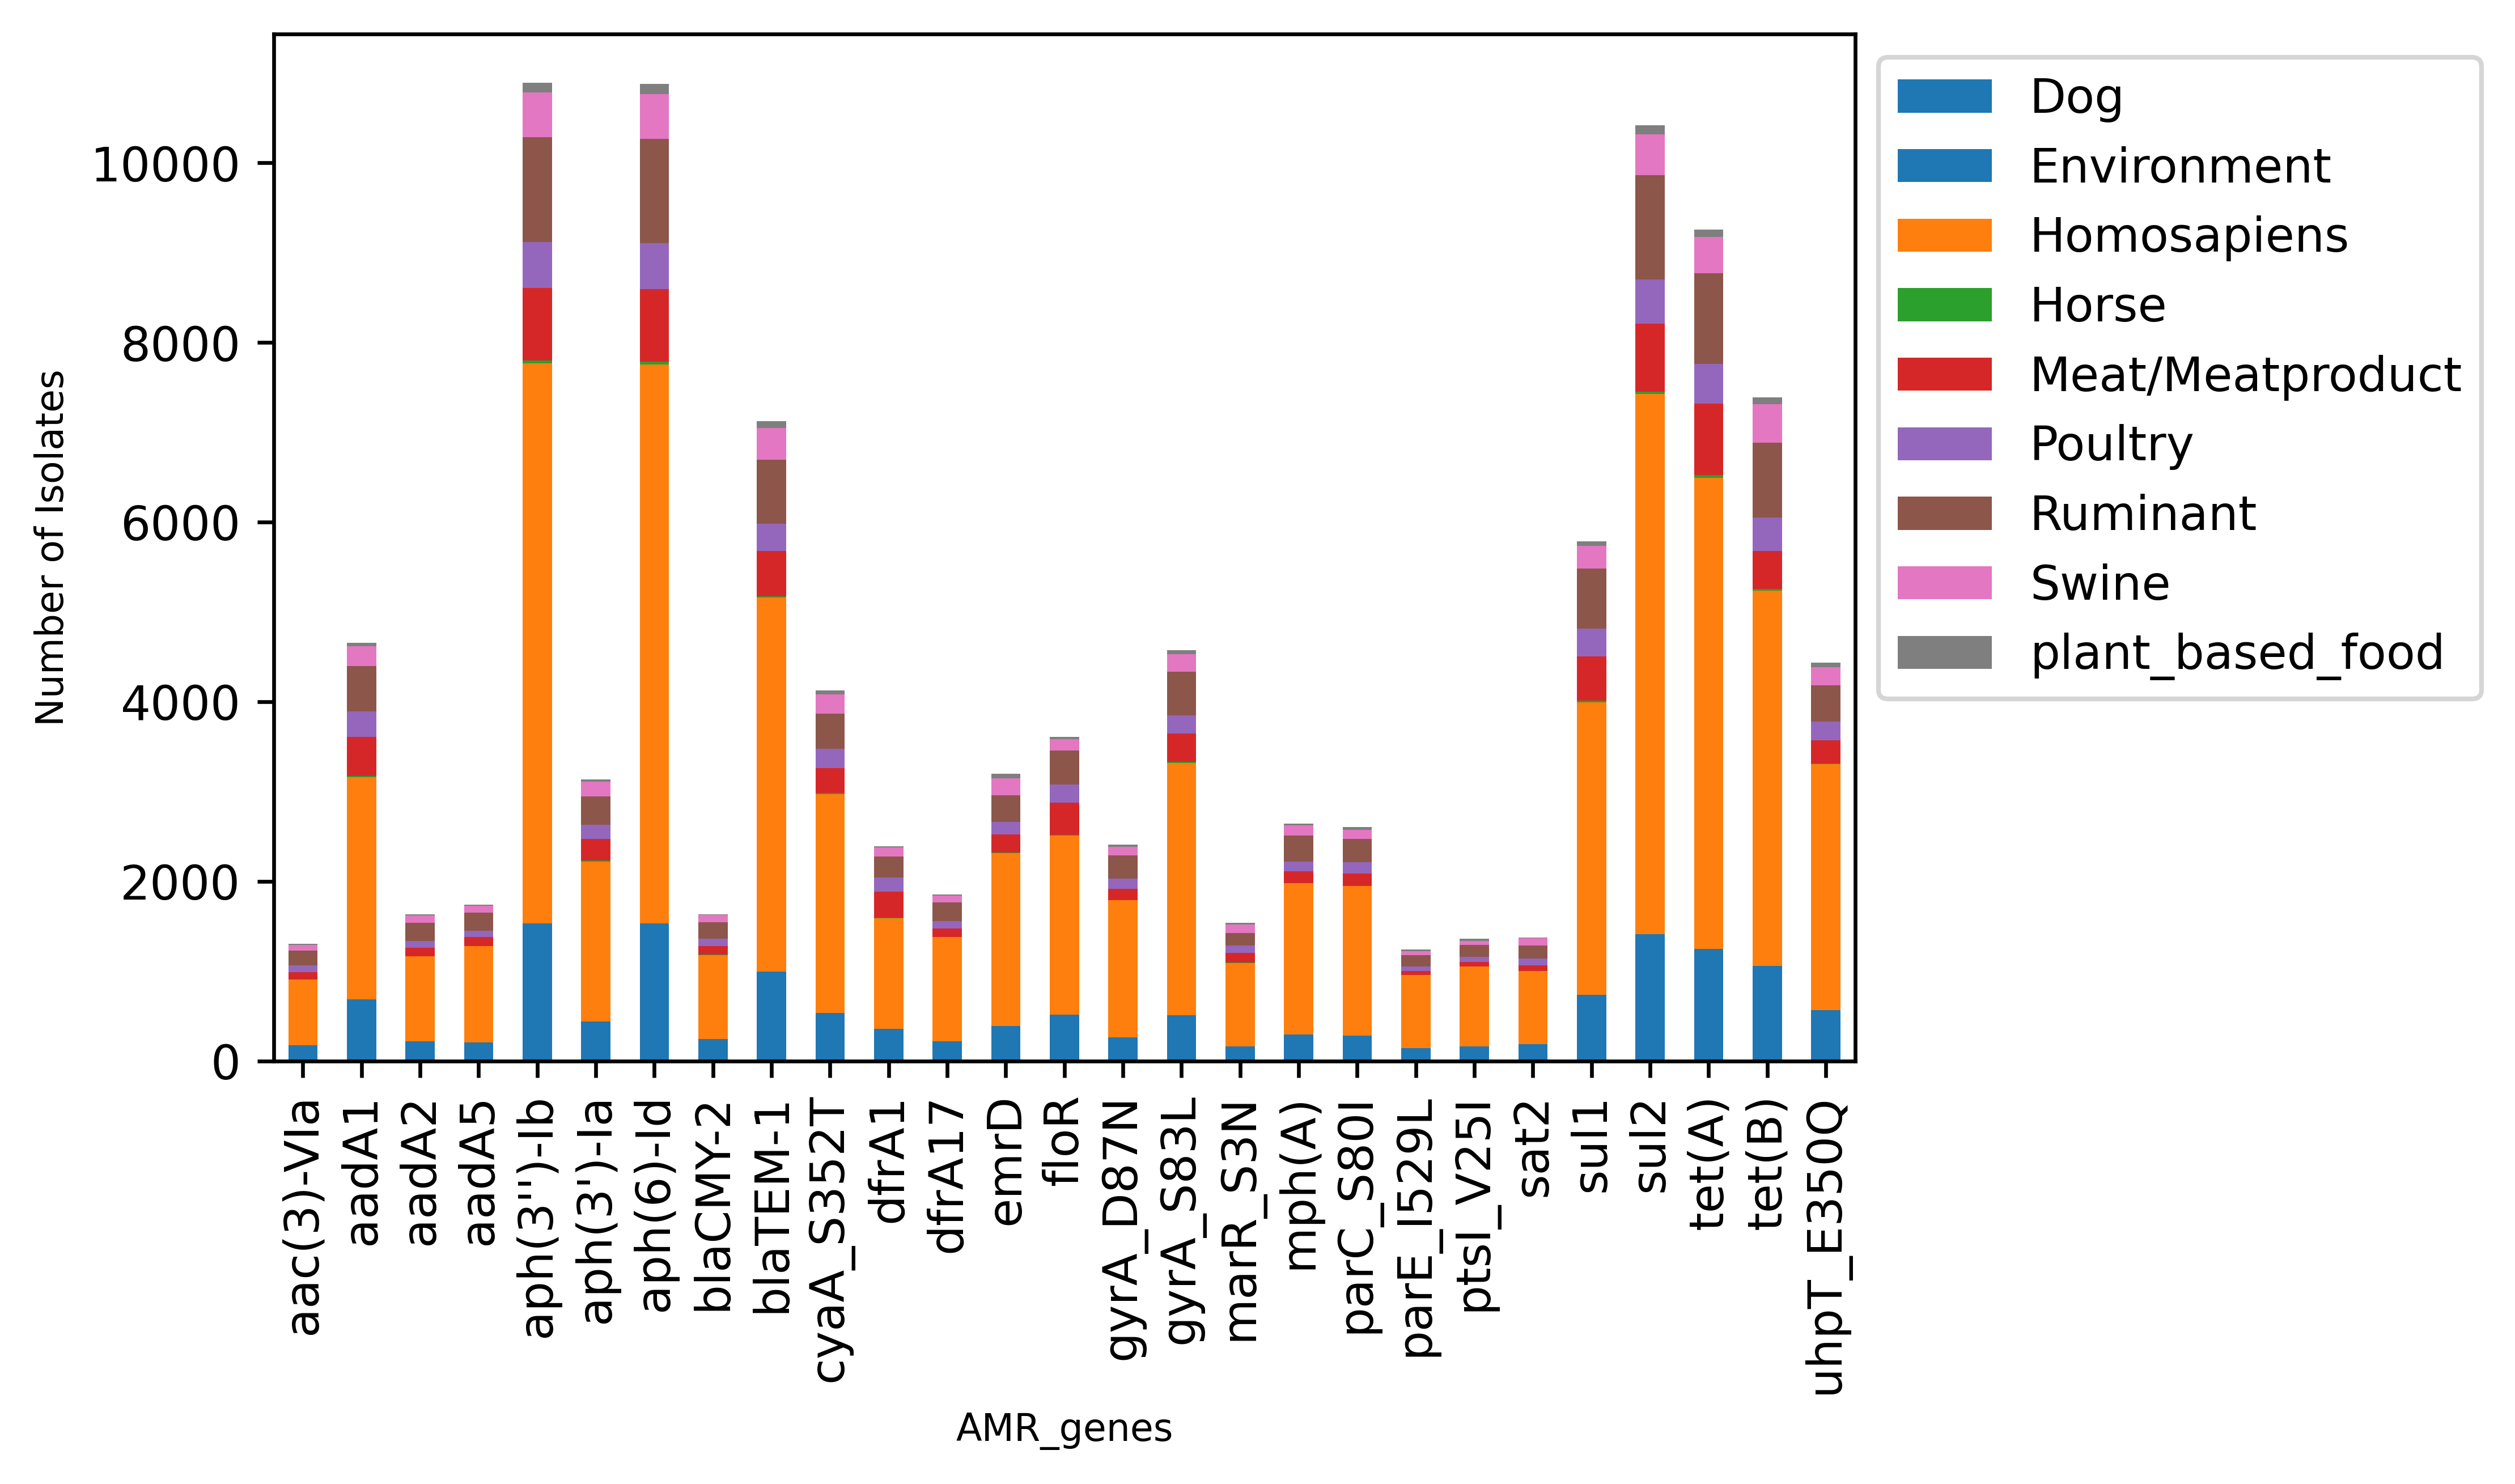

In [121]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
import matplotlib
from matplotlib.cm import tab10
n=len(list(dfgsh.columns))
def get_n_colors(n):
    return[ tab10(float(i)/n) for i in range(n) ]
colors = get_n_colors(n)
ax=dfgsh.plot.bar(stacked=True,color = colors)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
ax.set_ylabel('Number of Isolates', fontsize=8)
ax.set_xlabel('AMR_genes',fontsize=8)
